# libraries
import pandas as pd   
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# stop fuzzy charts
%config InlineBackend.figure_format = "retina"

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

### Importing the data
Streets, weather and bank holiday datasets

In [5]:
#importing all the dataframes
df_capel = pd.read_csv("data/capel-st-2015.csv",encoding='latin-1')               # DCC data - capel street
df_henry = pd.read_csv("data/henry-st-2015.csv",encoding='latin-1')               # DCC data - henry street
df_mary = pd.read_csv("data/mary-st.csv",encoding='latin-1')                      # DCC data - Mary street
df_oconnell = pd.read_csv("data/oconnell-st-clearys-2015.csv",encoding='latin-1') # DCC data - o'connell street
df_weather = pd.read_csv("data/weather.csv",encoding='latin-1')                   # weather for 2015
df_bankhol = pd.read_csv("data/bank_holidays.csv",encoding='latin-1')             # Bank holidays  for 2015

In [6]:
df_capel.shape   # checking the number of columns, rows

(365, 4)

In [7]:
df_capel.info() # checking for missing data and what kind of dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          365 non-null    object
 1   Capel_Street  365 non-null    int64 
 2   IN            365 non-null    int64 
 3   OUT           365 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [8]:
df_capel

Date  Capel_Street    IN   OUT
0    01/01/2015          3481  1593  1888
1    02/01/2015          4437  2150  2287
2    03/01/2015          5278  2819  2459
3    04/01/2015          4098  2020  2078
4    05/01/2015          5757  3162  2595
..          ...           ...   ...   ...
360  27/12/2015          4481  2165  2316
361  28/12/2015          4685  2254  2431
362  29/12/2015          5243  2481  2762
363  30/12/2015          5224  2546  2678
364  31/12/2015          5326  2704  2622

[365 rows x 4 columns]

Because I plan to merge all 4 datasets into one dataset for analysis. I will rename the col name "Capel_Street" and add a 'street' column to help with analysis. Later, I will make it is categorical varaible. 

In [9]:
#using pandas melt to reshape the data with capel as a street name

df_capel = df_capel.melt(id_vars =['Date', 'IN', 'OUT'], value_vars=['Capel_Street'], var_name =['street'])
df_capel

Date    IN   OUT        street  value
0    01/01/2015  1593  1888  Capel_Street   3481
1    02/01/2015  2150  2287  Capel_Street   4437
2    03/01/2015  2819  2459  Capel_Street   5278
3    04/01/2015  2020  2078  Capel_Street   4098
4    05/01/2015  3162  2595  Capel_Street   5757
..          ...   ...   ...           ...    ...
360  27/12/2015  2165  2316  Capel_Street   4481
361  28/12/2015  2254  2431  Capel_Street   4685
362  29/12/2015  2481  2762  Capel_Street   5243
363  30/12/2015  2546  2678  Capel_Street   5224
364  31/12/2015  2704  2622  Capel_Street   5326

[365 rows x 5 columns]

In [10]:
# check the shape of the data 
df_henry.shape

(365, 4)

In [11]:
df_henry

Date  Henry_Street       IN      OUT
0    01/01/2015       19321.0   9520.0   9801.0
1    02/01/2015       48178.0  23862.0  24316.0
2    03/01/2015       35378.0  17613.0  17765.0
3    04/01/2015       29164.0  13832.0  15332.0
4    05/01/2015       42606.0  20317.0  22289.0
..          ...           ...      ...      ...
360  27/12/2015       33546.0  16077.0  17469.0
361  28/12/2015       32270.0  15040.0  17230.0
362  29/12/2015           NaN      NaN      NaN
363  30/12/2015         987.0    334.0    653.0
364  31/12/2015       39224.0  18593.0  20631.0

[365 rows x 4 columns]

In [12]:
df_henry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          365 non-null    object 
 1   Henry_Street  363 non-null    float64
 2   IN            363 non-null    float64
 3   OUT           363 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


The are whole numbers so therefore can be represented by whole numbers

In [13]:
# making the variables integers
df_henry['Henry_Street'] = df_henry['Henry_Street'].astype('Int64') # make integer
df_henry['IN'] = df_henry['IN'].astype('Int64')                     # make integer
df_henry['OUT'] = df_henry['OUT'].astype('Int64')                   # make integer

# check the columns and types
df_henry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          365 non-null    object
 1   Henry_Street  363 non-null    Int64 
 2   IN            363 non-null    Int64 
 3   OUT           363 non-null    Int64 
dtypes: Int64(3), object(1)
memory usage: 12.6+ KB


I can see that the columns 1, 2, 3 are floats and that there are 2 missing values. I will run the melt first before handling missing data

In [14]:
#using melt to organise the data better
df_henry = df_henry.melt(id_vars =['Date', 'IN', 'OUT'], value_vars=['Henry_Street'], var_name =['street'])

In [15]:
df_henry['value'] = df_henry['value'].astype('Int64')                    # make integer

##### Henry street missing data

In [16]:
# how much is missing?
round(df_henry.isnull().sum() * 100 / len(df_henry), 2) #  get % and round to 2 decimals

Date      0.00
IN        0.55
OUT       0.55
street    0.00
value     0.55
dtype: float64

In [17]:
#checking na values
df_henry_na=df_henry[df_henry.isna().any(axis=1)]

df_henry_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 278 to 362
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2 non-null      object
 1   IN      0 non-null      Int64 
 2   OUT     0 non-null      Int64 
 3   street  2 non-null      object
 4   value   0 non-null      Int64 
dtypes: Int64(3), object(2)
memory usage: 102.0+ bytes


In [18]:
# summary statitics to see the central tendancy of the data
df_henry.describe()

IN           OUT         value
count    363.000000    363.000000    363.000000
mean   20335.754821  21217.936639  41553.691460
std     5400.429977   4615.671995   7752.247864
min      110.000000      0.000000    224.000000
25%    18699.000000  19432.000000  38352.000000
50%    20579.000000  22160.000000  42981.000000
75%    22090.500000  24051.500000  46060.500000
max    70189.000000  31410.000000  70444.000000

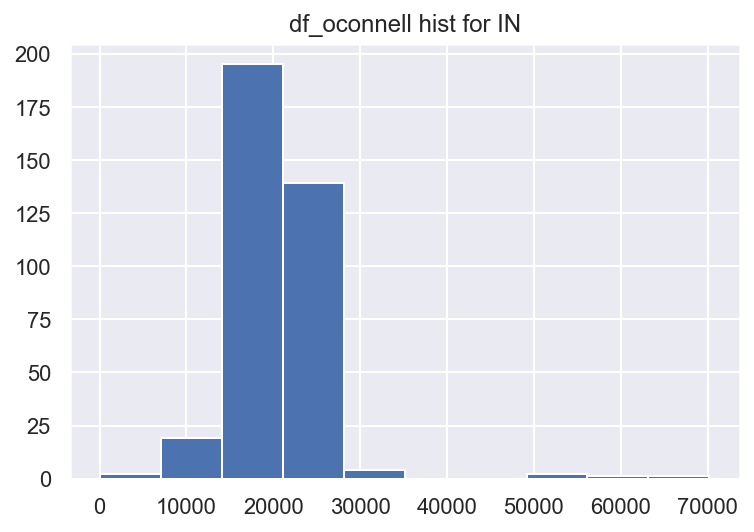

In [19]:
x = df_henry['IN'].dropna()
plt.hist(x);
plt.title("df_oconnell hist for IN");

Data is right skewed

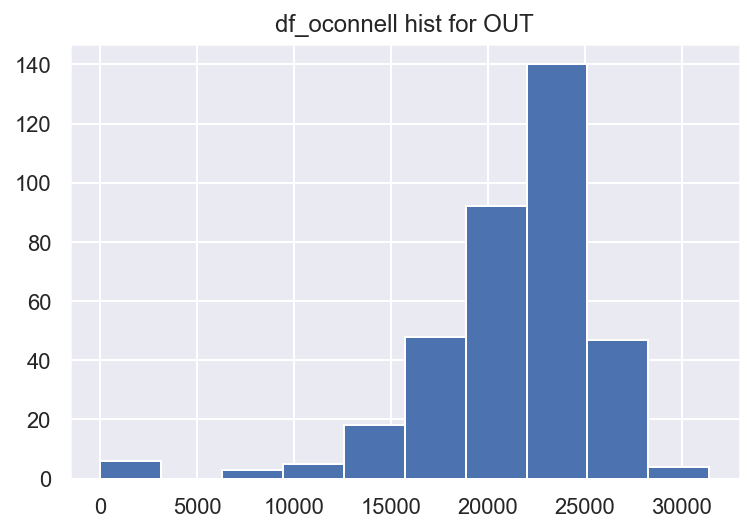

In [20]:
x = df_henry['OUT'].dropna()
plt.hist(x);
plt.title("df_oconnell hist for OUT");

Data is left shewed

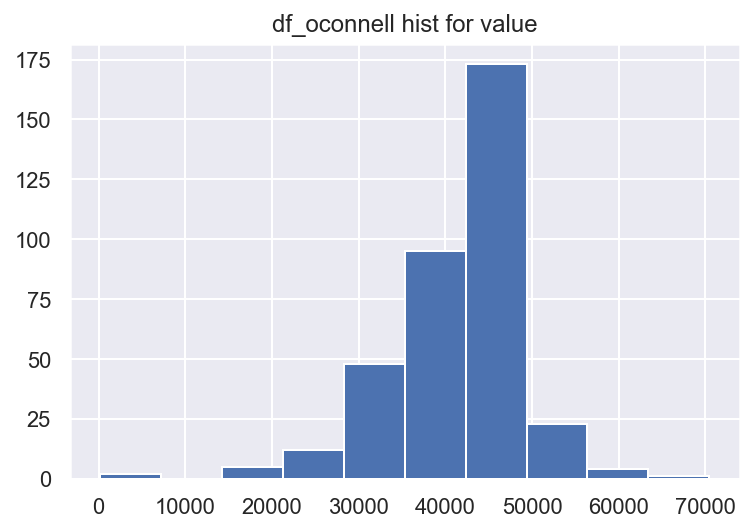

In [21]:
x = df_henry['value'].dropna()
plt.hist(x);
plt.title("df_oconnell hist for value");

In [22]:
# using the median strategy from simpleimputer to replace mssing values
from sklearn.impute import SimpleImputer

#mean strategy
imputer = SimpleImputer(strategy='median')

# in
imputer_in = imputer.fit(df_henry[['IN']])
df_henry['IN'] = imputer_in.transform(df_henry[['IN']]).ravel()

# out
imputer_out = imputer.fit(df_henry[['OUT']])
df_henry['OUT'] = imputer_out.transform(df_henry[['OUT']]).ravel()


# value 
imputer_value = imputer.fit(df_henry[['value']])
df_henry['value'] = imputer_value.transform(df_henry[['value']]).ravel()

In [23]:
df_henry.info()  # checking that there are 365 values for each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   IN      365 non-null    float64
 2   OUT     365 non-null    float64
 3   street  365 non-null    object 
 4   value   365 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.4+ KB


In [24]:
# summary statistics
df_henry.describe()

IN           OUT         value
count    365.000000    365.000000    365.000000
mean   20337.087671  21223.098630  41561.512329
std     5385.603212   4603.500867   7731.641085
min      110.000000      0.000000    224.000000
25%    18717.000000  19463.000000  38359.000000
50%    20579.000000  22160.000000  42981.000000
75%    22086.000000  24009.000000  46028.000000
max    70189.000000  31410.000000  70444.000000

In [25]:
df_mary.shape   # check the shape of the data

(365, 4)

In [26]:
df_mary

Date  Mary_Street    IN   OUT
0    01/01/2015         2257  1188  1069
1    02/01/2015         7077  3339  3738
2    03/01/2015         6139  2786  3353
3    04/01/2015         5322  2323  2999
4    05/01/2015         6670  3133  3537
..          ...          ...   ...   ...
360  27/12/2015         7022  4787  2235
361  28/12/2015         5367  4385   982
362  29/12/2015         6140  5045  1095
363  30/12/2015         6315  5557   758
364  31/12/2015         6332  5270  1062

[365 rows x 4 columns]

In [27]:
df_mary.info()  # check for missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Mary_Street  365 non-null    int64 
 2   IN           365 non-null    int64 
 3   OUT          365 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


There is no missing data in the Mary street dataset. Thankfully there is coverage for 365 days

In [28]:
# melt the data and make mary street a value
df_mary = df_mary.melt(id_vars =['Date', 'IN', 'OUT'], value_vars=['Mary_Street'], var_name =['street'])

In [29]:
# check the shape
df_oconnell.shape

(365, 4)

In [30]:
df_oconnell

Date   O_Connell_St_Outside_Clerys      IN     OUT
0    01/01/2015                       10761.0  5879.0  4882.0
1    02/01/2015                       16964.0  7414.0  9550.0
2    03/01/2015                       12856.0  5369.0  7487.0
3    04/01/2015                       10722.0  4786.0  5936.0
4    05/01/2015                       17099.0  8481.0  8618.0
..          ...                           ...     ...     ...
360  27/12/2015                       11715.0  5383.0  6332.0
361  28/12/2015                        8953.0  4712.0  4241.0
362  29/12/2015                       11527.0  6067.0  5460.0
363  30/12/2015                       11675.0  5722.0  5953.0
364  31/12/2015                       13783.0  6336.0  7447.0

[365 rows x 4 columns]

In [31]:
# types and check for missing data 
df_oconnell.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          365 non-null    object 
 1    O_Connell_St_Outside_Clerys  271 non-null    float64
 2   IN                            271 non-null    float64
 3   OUT                           271 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


I can see that there is missing data, at least 94 points missing for columns 1, 2 and 3. They values are also floats. i will rename " O_Connell_St_Outside_Clerys" as it is very long and has a whitespace at the beginning which can cause error. 
    

In [32]:
# rename to shorter more succinct name
df_oconnell = df_oconnell.rename(columns={' O_Connell_St_Outside_Clerys': 'O_Connell_St'})
df_oconnell 

Date  O_Connell_St      IN     OUT
0    01/01/2015       10761.0  5879.0  4882.0
1    02/01/2015       16964.0  7414.0  9550.0
2    03/01/2015       12856.0  5369.0  7487.0
3    04/01/2015       10722.0  4786.0  5936.0
4    05/01/2015       17099.0  8481.0  8618.0
..          ...           ...     ...     ...
360  27/12/2015       11715.0  5383.0  6332.0
361  28/12/2015        8953.0  4712.0  4241.0
362  29/12/2015       11527.0  6067.0  5460.0
363  30/12/2015       11675.0  5722.0  5953.0
364  31/12/2015       13783.0  6336.0  7447.0

[365 rows x 4 columns]

In [33]:
# melt again for categorising later
df_oconnell = df_oconnell.melt(id_vars =['Date', 'IN', 'OUT'], value_vars=['O_Connell_St'], var_name =['street'])

In [34]:
# change to integers
df_oconnell['value'] = df_oconnell['value'].astype('Int64') 
df_oconnell['IN'] = df_oconnell['IN'].astype('Int64') 
df_oconnell['OUT'] = df_oconnell['OUT'].astype('Int64')


df_oconnell

Date    IN   OUT        street  value
0    01/01/2015  5879  4882  O_Connell_St  10761
1    02/01/2015  7414  9550  O_Connell_St  16964
2    03/01/2015  5369  7487  O_Connell_St  12856
3    04/01/2015  4786  5936  O_Connell_St  10722
4    05/01/2015  8481  8618  O_Connell_St  17099
..          ...   ...   ...           ...    ...
360  27/12/2015  5383  6332  O_Connell_St  11715
361  28/12/2015  4712  4241  O_Connell_St   8953
362  29/12/2015  6067  5460  O_Connell_St  11527
363  30/12/2015  5722  5953  O_Connell_St  11675
364  31/12/2015  6336  7447  O_Connell_St  13783

[365 rows x 5 columns]

In [35]:
# check dtypes and missing data 
df_oconnell.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   IN      271 non-null    Int64 
 2   OUT     271 non-null    Int64 
 3   street  365 non-null    object
 4   value   271 non-null    Int64 
dtypes: Int64(3), object(2)
memory usage: 15.5+ KB


##### df_oconnell missing data

In [36]:
#getting the percentage of missing values for o'connell street. there is significant data missing
round(df_oconnell.isnull().sum() * 100 / len(df_oconnell), 2) #  get % and round to 2 decimals

Date       0.00
IN        25.75
OUT       25.75
street     0.00
value     25.75
dtype: float64

In [37]:
# summary stats and spread of the data 
df_oconnell.describe()

IN           OUT         value
count    271.000000    271.000000    271.000000
mean    6859.188192   7638.380074  14497.568266
std     1799.990086   2296.433071   3924.873217
min      588.000000    450.000000   1038.000000
25%     5900.000000   6234.500000  12116.500000
50%     7084.000000   7910.000000  15097.000000
75%     8055.500000   9211.500000  17160.000000
max    12284.000000  15363.000000  25384.000000

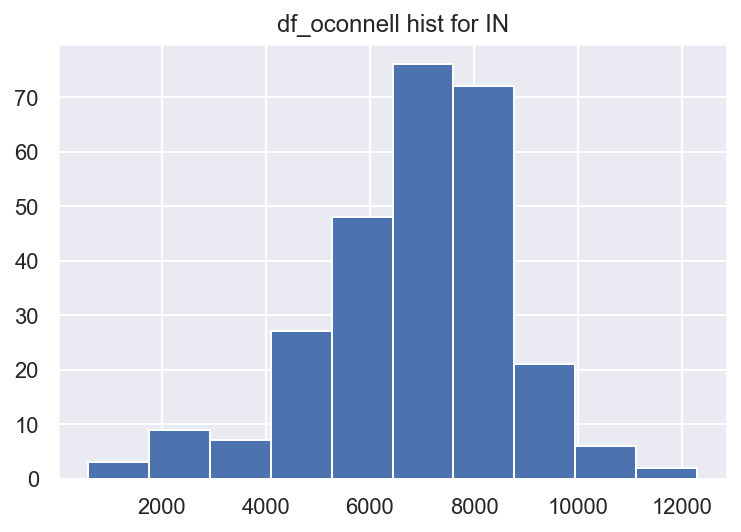

In [38]:
x = df_oconnell['IN'].dropna()
plt.hist(x);
plt.title("df_oconnell hist for IN");

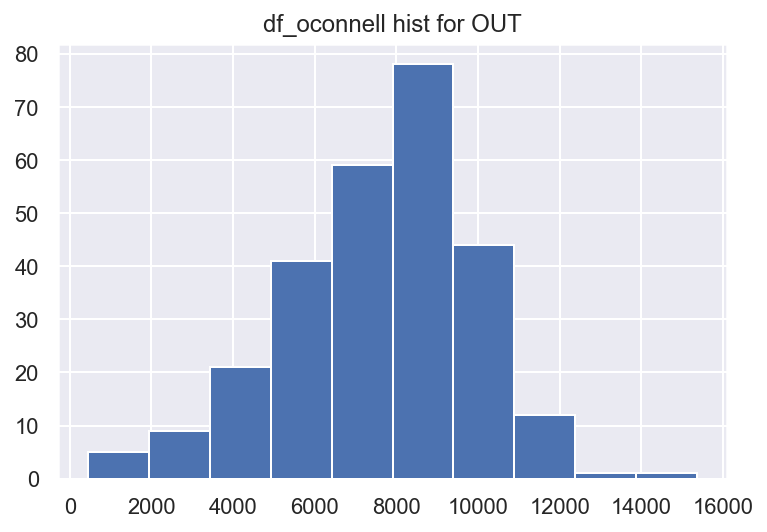

In [39]:
x = df_oconnell['OUT'].dropna()
plt.hist(x);
plt.title("df_oconnell hist for OUT");

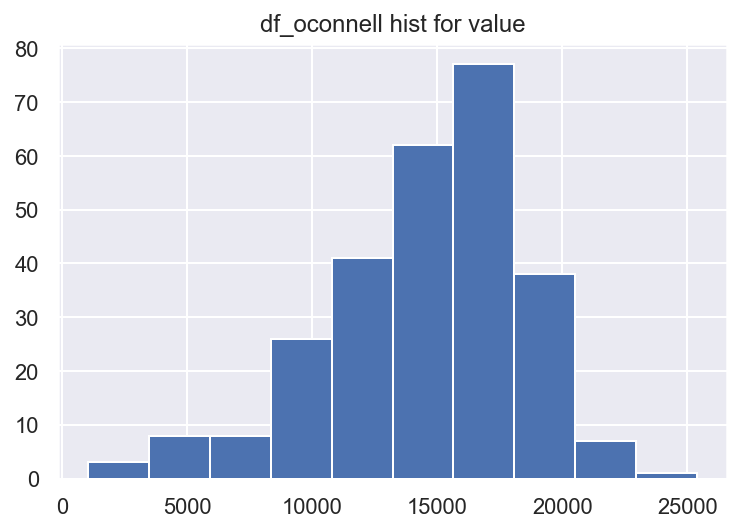

In [40]:
x = df_oconnell['value'].dropna()
plt.hist(x);
plt.title("df_oconnell hist for value");

In [41]:
df_oconnell

Date    IN   OUT        street  value
0    01/01/2015  5879  4882  O_Connell_St  10761
1    02/01/2015  7414  9550  O_Connell_St  16964
2    03/01/2015  5369  7487  O_Connell_St  12856
3    04/01/2015  4786  5936  O_Connell_St  10722
4    05/01/2015  8481  8618  O_Connell_St  17099
..          ...   ...   ...           ...    ...
360  27/12/2015  5383  6332  O_Connell_St  11715
361  28/12/2015  4712  4241  O_Connell_St   8953
362  29/12/2015  6067  5460  O_Connell_St  11527
363  30/12/2015  5722  5953  O_Connell_St  11675
364  31/12/2015  6336  7447  O_Connell_St  13783

[365 rows x 5 columns]

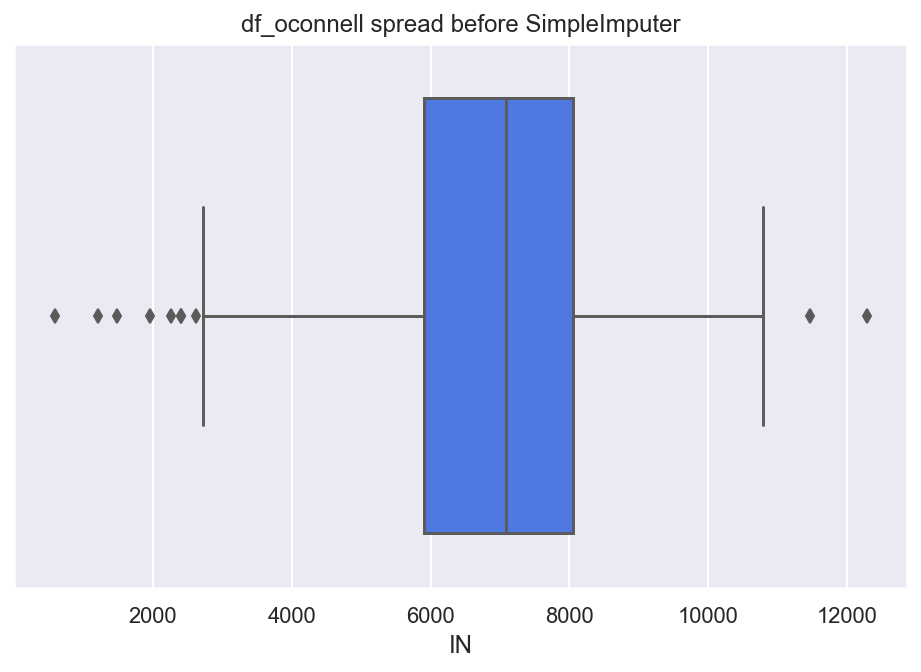

In [42]:
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(8, 5)); 

# checking the IN's data spread
sns.boxplot(data=df_oconnell, x="IN");
plt.title("df_oconnell spread before SimpleImputer");

### Missing data 

In [43]:
# using the median strategy from simpleimputer to replace mssing values
from sklearn.impute import SimpleImputer

#mean strategy
imputer = SimpleImputer(strategy='median')

# in
imputer_in_oc = imputer.fit(df_oconnell[['IN']])
df_oconnell['IN'] = imputer_in_oc.transform(df_oconnell[['IN']]).ravel()

# out
imputer_out_oc = imputer.fit(df_oconnell[['OUT']])
df_oconnell['OUT'] = imputer_out_oc.transform(df_oconnell[['OUT']]).ravel()


# value 
imputer_value_oc = imputer.fit(df_oconnell[['value']])
df_oconnell['value'] = imputer_value_oc.transform(df_oconnell[['value']]).ravel()

In [44]:
# summary stats
df_oconnell.describe()

IN           OUT         value
count    365.000000    365.000000    365.000000
mean    6917.084932   7708.331507  14651.942466
std     1553.370727   1981.384773   3390.487464
min      588.000000    450.000000   1038.000000
25%     6414.000000   7002.000000  13473.000000
50%     7084.000000   7910.000000  15097.000000
75%     7729.000000   8852.000000  16538.000000
max    12284.000000  15363.000000  25384.000000

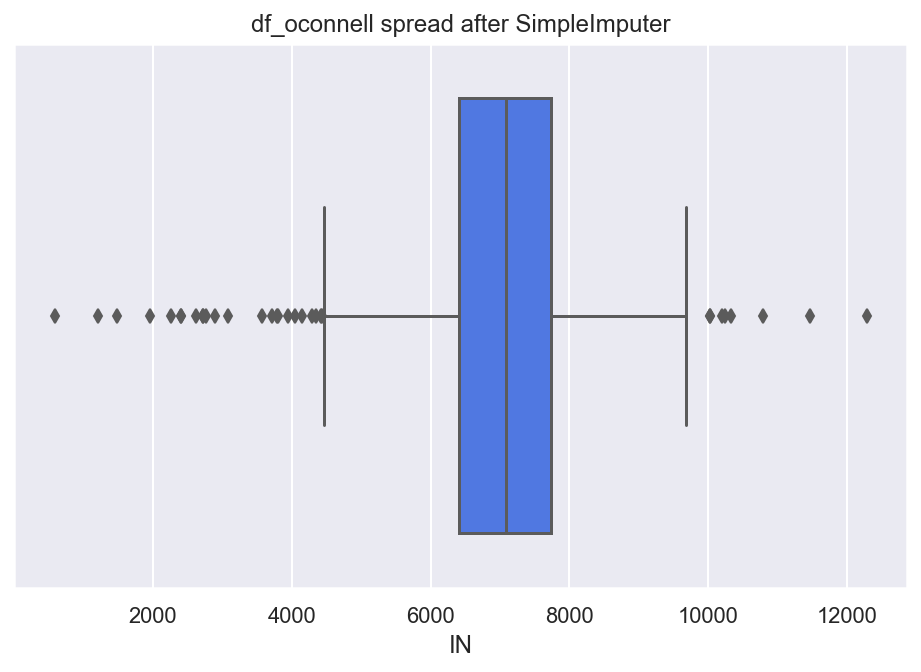

In [45]:
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(8, 5)); 

#checking the spread of IN after imputation 
sns.boxplot(data=df_oconnell, x="IN");
plt.title("df_oconnell spread after SimpleImputer");

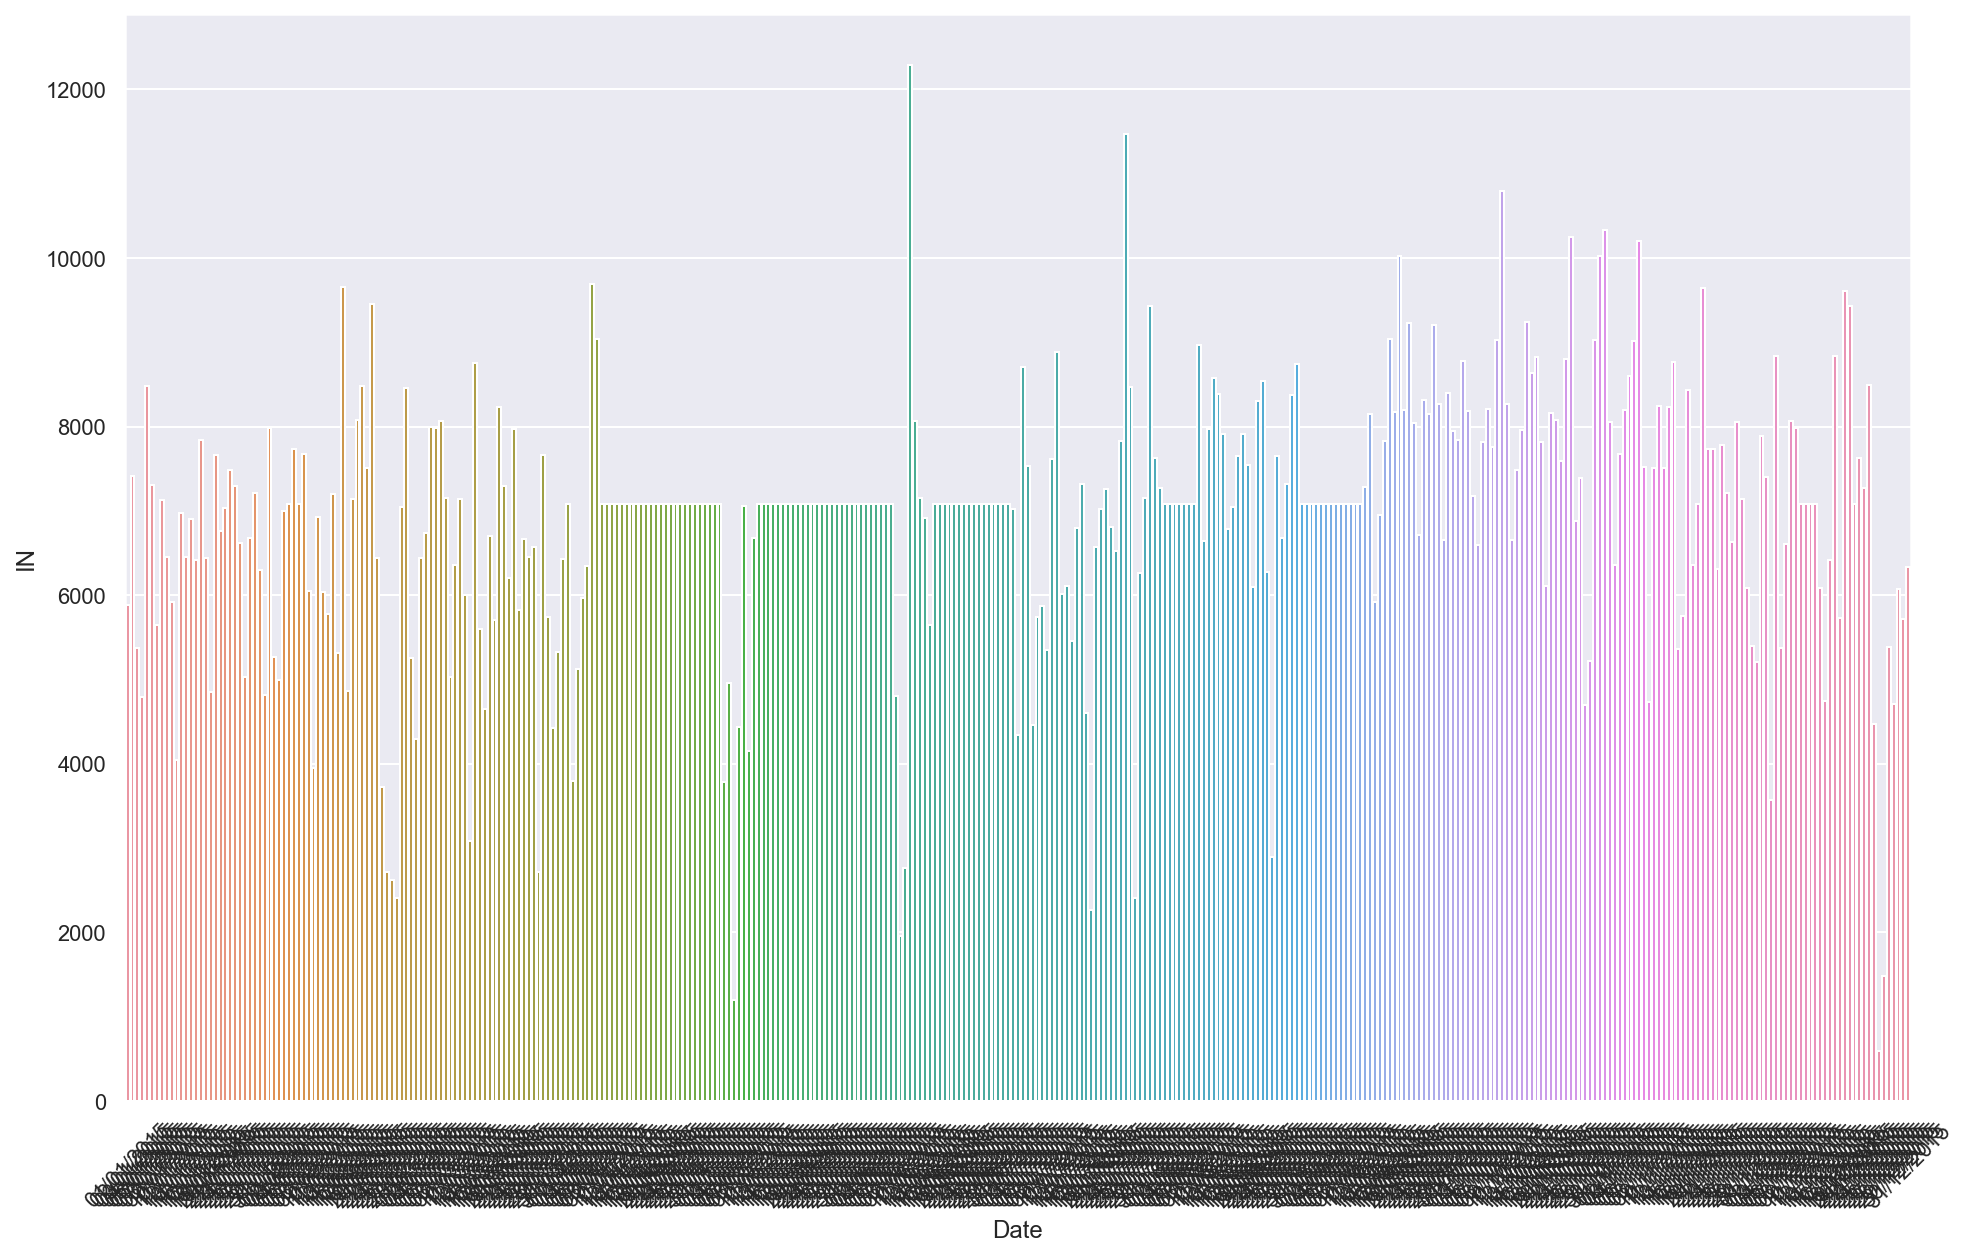

In [46]:
# view the effects of impute using the median
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 10)); 

sns.barplot(data=df_oconnell, x="Date", y="IN");
plt.xticks(rotation=45);

# Combine multiple datasets into one
Now I want to combine all the separate datasets into one to help with analysis

In [47]:
# list of the datasets
datasets = [df_capel, df_henry, df_mary, df_oconnell] 

df_total = pd.DataFrame() # create dataframe
# loop through datasets
for dataset in datasets: 
    # add dataset to the bottom of the total 
    df_total = df_total.append(dataset) 

df_total    

Date      IN     OUT        street    value
0    01/01/2015  1593.0  1888.0  Capel_Street   3481.0
1    02/01/2015  2150.0  2287.0  Capel_Street   4437.0
2    03/01/2015  2819.0  2459.0  Capel_Street   5278.0
3    04/01/2015  2020.0  2078.0  Capel_Street   4098.0
4    05/01/2015  3162.0  2595.0  Capel_Street   5757.0
..          ...     ...     ...           ...      ...
360  27/12/2015  5383.0  6332.0  O_Connell_St  11715.0
361  28/12/2015  4712.0  4241.0  O_Connell_St   8953.0
362  29/12/2015  6067.0  5460.0  O_Connell_St  11527.0
363  30/12/2015  5722.0  5953.0  O_Connell_St  11675.0
364  31/12/2015  6336.0  7447.0  O_Connell_St  13783.0

[1460 rows x 5 columns]

In [48]:
# grouping by street to see what street has the most missing
df_total.groupby(by="street", dropna=False).count()   

Date   IN  OUT  value
street                             
Capel_Street   365  365  365    365
Henry_Street   365  365  365    365
Mary_Street    365  365  365    365
O_Connell_St   365  365  365    365

As we can see there are missing values

### Total number of missing values

In [49]:
# checking the missing values
df_total.isnull().sum()

Date      0
IN        0
OUT       0
street    0
value     0
dtype: int64

### What is the percentage of missing values?

In [50]:
# percentage of missig values
df_total.isnull().sum() * 100 / len(df_total)

Date      0.0
IN        0.0
OUT       0.0
street    0.0
value     0.0
dtype: float64

In [51]:
df_new = df_total

In [52]:
#changing street to a categorical varaiable
df_new['street'] = df_new['street'].astype("category")


df_new['street']
#Categories (4, object): ['Capel_Street', 'Henry_Street', 'Mary_Street', 'O_Connell_St']

0      Capel_Street
1      Capel_Street
2      Capel_Street
3      Capel_Street
4      Capel_Street
           ...     
360    O_Connell_St
361    O_Connell_St
362    O_Connell_St
363    O_Connell_St
364    O_Connell_St
Name: street, Length: 1460, dtype: category
Categories (4, object): ['Capel_Street', 'Henry_Street', 'Mary_Street', 'O_Connell_St']

### To help identify patterns in days and months, i'm going to break apart the date column

In [53]:
# convert the date column to date format
df_new['Date'] = df_new['Date'].apply(pd.to_datetime) 

# create a new column for day of the week
df_new['day']= df_new['Date'].dt.day_name() 

# create a new column for month
df_new['month']= df_new['Date'].dt.month_name()  

# create a new column for week number
df_new['week']= df_new['Date'].dt.isocalendar().week

#View dataframe
df_new

Date      IN     OUT        street    value        day     month  \
0   2015-01-01  1593.0  1888.0  Capel_Street   3481.0   Thursday   January   
1   2015-02-01  2150.0  2287.0  Capel_Street   4437.0     Sunday  February   
2   2015-03-01  2819.0  2459.0  Capel_Street   5278.0     Sunday     March   
3   2015-04-01  2020.0  2078.0  Capel_Street   4098.0  Wednesday     April   
4   2015-05-01  3162.0  2595.0  Capel_Street   5757.0     Friday       May   
..         ...     ...     ...           ...      ...        ...       ...   
360 2015-12-27  5383.0  6332.0  O_Connell_St  11715.0     Sunday  December   
361 2015-12-28  4712.0  4241.0  O_Connell_St   8953.0     Monday  December   
362 2015-12-29  6067.0  5460.0  O_Connell_St  11527.0    Tuesday  December   
363 2015-12-30  5722.0  5953.0  O_Connell_St  11675.0  Wednesday  December   
364 2015-12-31  6336.0  7447.0  O_Connell_St  13783.0   Thursday  December   

     week  
0       1  
1       5  
2       9  
3      14  
4      18  
..    ...  
360    52  
361    53  
362    53  
363    53  
364    53  

[1460 rows x 8 columns]

### Add in weather dataset
To see if the weather has any effect on the footfall on the streets

In [54]:
#Selecting the columns to add to the dataset
new_weather = df_weather.filter(["time", "tavg", "tmin", "tmax", "prcp"])

# renaming for merging datasets later
new_weather = new_weather.rename(columns={'time': 'Date'})  

# convert the date column to date format
new_weather['Date'] = new_weather['Date'].apply(pd.to_datetime) 
new_weather

Date  tavg  tmin  tmax  prcp
0   2015-01-01  11.4   8.9  14.1   4.6
1   2015-01-02   5.4   3.2   6.8   8.4
2   2015-01-03   3.1   3.5   5.8   1.2
3   2015-01-04   2.2  -2.4   9.8   0.0
4   2015-01-05   8.5  -1.6  12.0   0.8
..         ...   ...   ...   ...   ...
360 2015-12-27   5.7  -0.8  13.0   0.0
361 2015-12-28  11.5  -0.8  13.6   4.9
362 2015-12-29   9.3   6.6  14.2  14.5
363 2015-12-30   9.2   6.6  10.9   5.8
364 2015-12-31   4.3   3.1   7.1   0.7

[365 rows x 5 columns]

### Merging to dataset

In [55]:
# merge weather to df_new
df_new = pd.merge_ordered(df_new, new_weather, fill_method="fill", left_by="Date")

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1460 non-null   datetime64[ns]
 1   IN      1460 non-null   float64       
 2   OUT     1460 non-null   float64       
 3   street  1460 non-null   category      
 4   value   1460 non-null   float64       
 5   day     1460 non-null   object        
 6   month   1460 non-null   object        
 7   week    1460 non-null   UInt32        
 8   tavg    1460 non-null   float64       
 9   tmin    1460 non-null   float64       
 10  tmax    1460 non-null   float64       
 11  prcp    1460 non-null   float64       
dtypes: UInt32(1), category(1), datetime64[ns](1), float64(7), object(2)
memory usage: 122.9+ KB


### Add in bank holiday 

I want to see if Bank holidays have an affect on the footfall in the streets. Bank holiday will be represented as a boolean as it is either True or False. 

In [57]:
df_bankhol
# convert to boolean - 1 is a bank holiday
df_bankhol['bank_holiday'] = df_bankhol['bank_holiday'].astype('bool')

# convert the date column to date format
df_bankhol['Date'] = df_bankhol['Date'].apply(pd.to_datetime)
df_bankhol.info()

Date  bank_holiday
0  2015-01-01             1
1  2015-03-17             1
2  2015-04-06             1
3  2015-05-04             1
4  2015-06-01             1
5  2015-08-03             1
6  2015-10-26             1
7  2015-12-25             1
8  2015-12-26             1
9  2015-12-28             1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10 non-null     datetime64[ns]
 1   bank_holiday  10 non-null     bool          
dtypes: bool(1), datetime64[ns](1)
memory usage: 218.0 bytes


In [58]:
# merging the bank holidays with the dataset, bank holiday will be a boolean value 
df_new = pd.merge_ordered(df_new, df_bankhol, fill_method="fill", left_by="Date")

# replacing the nan value with boolean
df_new['bank_holiday'] = df_new['bank_holiday'].fillna(0).astype('bool')       

df_new

Date       IN      OUT        street    value        day     month  \
0    2015-01-01   1593.0   1888.0  Capel_Street   3481.0   Thursday   January   
1    2015-01-01   9520.0   9801.0  Henry_Street  19321.0   Thursday   January   
2    2015-01-01   1188.0   1069.0   Mary_Street   2257.0   Thursday   January   
3    2015-01-01   5879.0   4882.0  O_Connell_St  10761.0   Thursday   January   
4    2015-02-01   2150.0   2287.0  Capel_Street   4437.0     Sunday  February   
...         ...      ...      ...           ...      ...        ...       ...   
1455 2015-12-30   5722.0   5953.0  O_Connell_St  11675.0  Wednesday  December   
1456 2015-12-31   2704.0   2622.0  Capel_Street   5326.0   Thursday  December   
1457 2015-12-31  18593.0  20631.0  Henry_Street  39224.0   Thursday  December   
1458 2015-12-31   5270.0   1062.0   Mary_Street   6332.0   Thursday  December   
1459 2015-12-31   6336.0   7447.0  O_Connell_St  13783.0   Thursday  December   

      week  tavg  tmin  tmax  prcp  bank_holiday  
0        1  11.4   8.9  14.1   4.6          True  
1        1  11.4   8.9  14.1   4.6          True  
2        1  11.4   8.9  14.1   4.6          True  
3        1  11.4   8.9  14.1   4.6          True  
4        5   0.7  -1.9   4.6   0.0         False  
...    ...   ...   ...   ...   ...           ...  
1455    53   9.2   6.6  10.9   5.8         False  
1456    53   4.3   3.1   7.1   0.7         False  
1457    53   4.3   3.1   7.1   0.7         False  
1458    53   4.3   3.1   7.1   0.7         False  
1459    53   4.3   3.1   7.1   0.7         False  

[1460 rows x 13 columns]

### Add Christmas countdown

In [59]:
# christmas date
df_new['Christmas'] = "2015-12-25"
#convert to date format wth pandas
df_new['Christmas'] = df_new['Christmas'].apply(pd.to_datetime) 

# countdown to christmas function - takes the date and christmas column and subtracts
def countdown(Christmas,Date):
    # returns the days remaining until christmas
    return  Date - Christmas

#using lamabda to apply the funtion
df_new['d_countdown'] = df_new.apply(lambda f: countdown(f['Date'],f['Christmas']), axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   Date          1460 non-null   datetime64[ns] 
 1   IN            1460 non-null   float64        
 2   OUT           1460 non-null   float64        
 3   street        1460 non-null   category       
 4   value         1460 non-null   float64        
 5   day           1460 non-null   object         
 6   month         1460 non-null   object         
 7   week          1460 non-null   UInt32         
 8   tavg          1460 non-null   float64        
 9   tmin          1460 non-null   float64        
 10  tmax          1460 non-null   float64        
 11  prcp          1460 non-null   float64        
 12  bank_holiday  1460 non-null   bool           
 13  Christmas     1460 non-null   datetime64[ns] 
 14  d_countdown   1460 non-null   timedelta64[ns]
dtypes: UInt32(1), bool(1)

In [60]:
#convert to int64 for analysis later
df_new["days_countdown"] = (df_new["d_countdown"]).dt.days
# removing columns -  christmas and d_countdown column as they are no longer required
df_new = df_new.drop(['Christmas','d_countdown'],  1)
df_new

Date       IN      OUT        street    value        day     month  \
0    2015-01-01   1593.0   1888.0  Capel_Street   3481.0   Thursday   January   
1    2015-01-01   9520.0   9801.0  Henry_Street  19321.0   Thursday   January   
2    2015-01-01   1188.0   1069.0   Mary_Street   2257.0   Thursday   January   
3    2015-01-01   5879.0   4882.0  O_Connell_St  10761.0   Thursday   January   
4    2015-02-01   2150.0   2287.0  Capel_Street   4437.0     Sunday  February   
...         ...      ...      ...           ...      ...        ...       ...   
1455 2015-12-30   5722.0   5953.0  O_Connell_St  11675.0  Wednesday  December   
1456 2015-12-31   2704.0   2622.0  Capel_Street   5326.0   Thursday  December   
1457 2015-12-31  18593.0  20631.0  Henry_Street  39224.0   Thursday  December   
1458 2015-12-31   5270.0   1062.0   Mary_Street   6332.0   Thursday  December   
1459 2015-12-31   6336.0   7447.0  O_Connell_St  13783.0   Thursday  December   

      week  tavg  tmin  tmax  prcp  bank_holiday  days_countdown  
0        1  11.4   8.9  14.1   4.6          True             358  
1        1  11.4   8.9  14.1   4.6          True             358  
2        1  11.4   8.9  14.1   4.6          True             358  
3        1  11.4   8.9  14.1   4.6          True             358  
4        5   0.7  -1.9   4.6   0.0         False             327  
...    ...   ...   ...   ...   ...           ...             ...  
1455    53   9.2   6.6  10.9   5.8         False              -5  
1456    53   4.3   3.1   7.1   0.7         False              -6  
1457    53   4.3   3.1   7.1   0.7         False              -6  
1458    53   4.3   3.1   7.1   0.7         False              -6  
1459    53   4.3   3.1   7.1   0.7         False              -6  

[1460 rows x 14 columns]

In [61]:
df_new.describe()

IN           OUT         value         week         tavg  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean    8510.521233   8383.567123  16901.051370    27.000000     9.551233   
std     7545.542669   8153.658770  15318.602635    15.062857     4.020425   
min      110.000000      0.000000    224.000000     1.000000    -1.300000   
25%     3253.000000   2480.000000   5754.750000    14.000000     6.700000   
50%     4889.500000   3523.000000   7878.500000    27.000000     9.900000   
75%    10021.250000  11040.000000  20627.500000    40.000000    12.500000   
max    70189.000000  31410.000000  70444.000000    53.000000    19.800000   

              tmin         tmax         prcp  days_countdown  
count  1460.000000  1460.000000  1460.000000     1460.000000  
mean      6.119452    13.929863     2.337808      176.000000  
std       4.228320     4.559813     4.164999      105.402131  
min      -5.500000     2.500000     0.000000       -6.000000  
25%       3.100000    10.800000     0.000000       85.000000  
50%       6.400000    14.300000     0.300000      176.000000  
75%       9.200000    17.400000     3.200000      267.000000  
max      16.400000    25.600000    29.800000      358.000000

In [62]:
df_new.describe(include=object)

day    month
count       1460     1460
unique         7       12
top     Thursday  January
freq         212      124

### Categorical Date

Handling categorical data and putting it to the correct order for graphing

In [63]:
# order categorical data in a specific order for charts
df_new.month = pd.Categorical(df_new.month, 
                      categories=["January","February","March","April", "May", "June", "July", 
                                 "August", "September", "October", "November", "December"],
                      ordered=True)

#Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [64]:
# turn into a categorical variable with order for the charts
df_new.day = pd.Categorical(df_new.day, 
                      categories=["Monday","Tuesday","Wednesday","Thursday", "Friday", "Saturday", "Sunday"],
                      ordered=True)
#Categories (5, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday']

In [65]:
df_new.dtypes

Date              datetime64[ns]
IN                       float64
OUT                      float64
street                  category
value                    float64
day                     category
month                   category
week                      UInt32
tavg                     float64
tmin                     float64
tmax                     float64
prcp                     float64
bank_holiday                bool
days_countdown             int64
dtype: object

### Descriptive Statistics 
We are now going to look at the descriptive statistics of the variables. add reference to the book here. 

In [66]:
# summary of numeric columns only
df_new.describe()

IN           OUT         value         week         tavg  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean    8510.521233   8383.567123  16901.051370    27.000000     9.551233   
std     7545.542669   8153.658770  15318.602635    15.062857     4.020425   
min      110.000000      0.000000    224.000000     1.000000    -1.300000   
25%     3253.000000   2480.000000   5754.750000    14.000000     6.700000   
50%     4889.500000   3523.000000   7878.500000    27.000000     9.900000   
75%    10021.250000  11040.000000  20627.500000    40.000000    12.500000   
max    70189.000000  31410.000000  70444.000000    53.000000    19.800000   

              tmin         tmax         prcp  days_countdown  
count  1460.000000  1460.000000  1460.000000     1460.000000  
mean      6.119452    13.929863     2.337808      176.000000  
std       4.228320     4.559813     4.164999      105.402131  
min      -5.500000     2.500000     0.000000       -6.000000  
25%       3.100000    10.800000     0.000000       85.000000  
50%       6.400000    14.300000     0.300000      176.000000  
75%       9.200000    17.400000     3.200000      267.000000  
max      16.400000    25.600000    29.800000      358.000000

### measures of central tendency 

In [67]:
# checking the mean, mode and median 
df_new['IN'].mean()
df_new['IN'].mode()
df_new['IN'].median()

8510.521232876712

0    7084.0
dtype: float64

4889.5

In [68]:
# getting the mean of all the varibles
meanData = df_new.mean();  

meanData

IN                 8510.521233
OUT                8383.567123
value             16901.051370
week                 27.000000
tavg                  9.551233
tmin                  6.119452
tmax                 13.929863
prcp                  2.337808
bank_holiday          0.027397
days_countdown      176.000000
dtype: float64

In [69]:
# getting the median of all the varibles
medianData = df_new.median();
medianData

IN                4889.5
OUT               3523.0
value             7878.5
week                27.0
tavg                 9.9
tmin                 6.4
tmax                14.3
prcp                 0.3
bank_holiday         0.0
days_countdown     176.0
dtype: float64

In [70]:
# getting the mode of all the varibles
modeData = df_new.mode();
modeData

Date      IN     OUT        street    value       day    month  \
0   2015-01-01  7084.0  7910.0  Capel_Street  15097.0  Thursday  January   
1   2015-01-02     NaN     NaN  Henry_Street      NaN       NaN    March   
2   2015-01-03     NaN     NaN   Mary_Street      NaN       NaN      May   
3   2015-01-04     NaN     NaN  O_Connell_St      NaN       NaN     July   
4   2015-01-05     NaN     NaN           NaN      NaN       NaN   August   
..         ...     ...     ...           ...      ...       ...      ...   
360 2015-12-27     NaN     NaN           NaN      NaN       NaN      NaN   
361 2015-12-28     NaN     NaN           NaN      NaN       NaN      NaN   
362 2015-12-29     NaN     NaN           NaN      NaN       NaN      NaN   
363 2015-12-30     NaN     NaN           NaN      NaN       NaN      NaN   
364 2015-12-31     NaN     NaN           NaN      NaN       NaN      NaN   

     week  tavg  tmin  tmax  prcp bank_holiday  days_countdown  
0       2   9.1   1.0  14.8   0.0        False              -6  
1       3   NaN   3.1  17.1   NaN          NaN              -5  
2       4   NaN   6.5  17.4   NaN          NaN              -4  
3       5   NaN   7.2  17.7   NaN          NaN              -3  
4       6   NaN   7.4  18.5   NaN          NaN              -2  
..    ...   ...   ...   ...   ...          ...             ...  
360  <NA>   NaN   NaN   NaN   NaN          NaN             354  
361  <NA>   NaN   NaN   NaN   NaN          NaN             355  
362  <NA>   NaN   NaN   NaN   NaN          NaN             356  
363  <NA>   NaN   NaN   NaN   NaN          NaN             357  
364  <NA>   NaN   NaN   NaN   NaN          NaN             358  

[365 rows x 14 columns]

In [71]:
df_new.describe(include='all')

Date            IN           OUT        street  \
count                  1460   1460.000000   1460.000000          1460   
unique                  365           NaN           NaN             4   
top     2015-01-01 00:00:00           NaN           NaN  Capel_Street   
freq                      4           NaN           NaN           365   
first   2015-01-01 00:00:00           NaN           NaN           NaN   
last    2015-12-31 00:00:00           NaN           NaN           NaN   
mean                    NaN   8510.521233   8383.567123           NaN   
std                     NaN   7545.542669   8153.658770           NaN   
min                     NaN    110.000000      0.000000           NaN   
25%                     NaN   3253.000000   2480.000000           NaN   
50%                     NaN   4889.500000   3523.000000           NaN   
75%                     NaN  10021.250000  11040.000000           NaN   
max                     NaN  70189.000000  31410.000000           NaN   

               value       day    month         week         tavg  \
count    1460.000000      1460     1460  1460.000000  1460.000000   
unique           NaN         7       12          NaN          NaN   
top              NaN  Thursday  January          NaN          NaN   
freq             NaN       212      124          NaN          NaN   
first            NaN       NaN      NaN          NaN          NaN   
last             NaN       NaN      NaN          NaN          NaN   
mean    16901.051370       NaN      NaN    27.000000     9.551233   
std     15318.602635       NaN      NaN    15.062857     4.020425   
min       224.000000       NaN      NaN     1.000000    -1.300000   
25%      5754.750000       NaN      NaN    14.000000     6.700000   
50%      7878.500000       NaN      NaN    27.000000     9.900000   
75%     20627.500000       NaN      NaN    40.000000    12.500000   
max     70444.000000       NaN      NaN    53.000000    19.800000   

               tmin         tmax         prcp bank_holiday  days_countdown  
count   1460.000000  1460.000000  1460.000000         1460     1460.000000  
unique          NaN          NaN          NaN            2             NaN  
top             NaN          NaN          NaN        False             NaN  
freq            NaN          NaN          NaN         1420             NaN  
first           NaN          NaN          NaN          NaN             NaN  
last            NaN          NaN          NaN          NaN             NaN  
mean       6.119452    13.929863     2.337808          NaN      176.000000  
std        4.228320     4.559813     4.164999          NaN      105.402131  
min       -5.500000     2.500000     0.000000          NaN       -6.000000  
25%        3.100000    10.800000     0.000000          NaN       85.000000  
50%        6.400000    14.300000     0.300000          NaN      176.000000  
75%        9.200000    17.400000     3.200000          NaN      267.000000  
max       16.400000    25.600000    29.800000          NaN      358.000000

### Let's look at the average footfall on a bank holiday against non bank holiday

In [72]:
#df_bankholiday = pd.df_new({"bank_holiday":[True]})
df_bankholiday = df_new.query('bank_holiday == True')
df_no_bankholiday = df_new.query('bank_holiday == False')


print("IN value median with bank holiday", df_bankholiday['IN'].median())
print("IN value mean with bank holiday", df_bankholiday['IN'].mean())
print("##################")
print("IN value emdian without bank holiday", df_no_bankholiday['IN'].median())
print("IN value mean without bank holiday", df_no_bankholiday['IN'].mean())

IN value median with bank holiday 3235.5
IN value mean with bank holiday 5844.2
##################
IN value emdian without bank holiday 4959.5
IN value mean without bank holiday 8585.628873239437


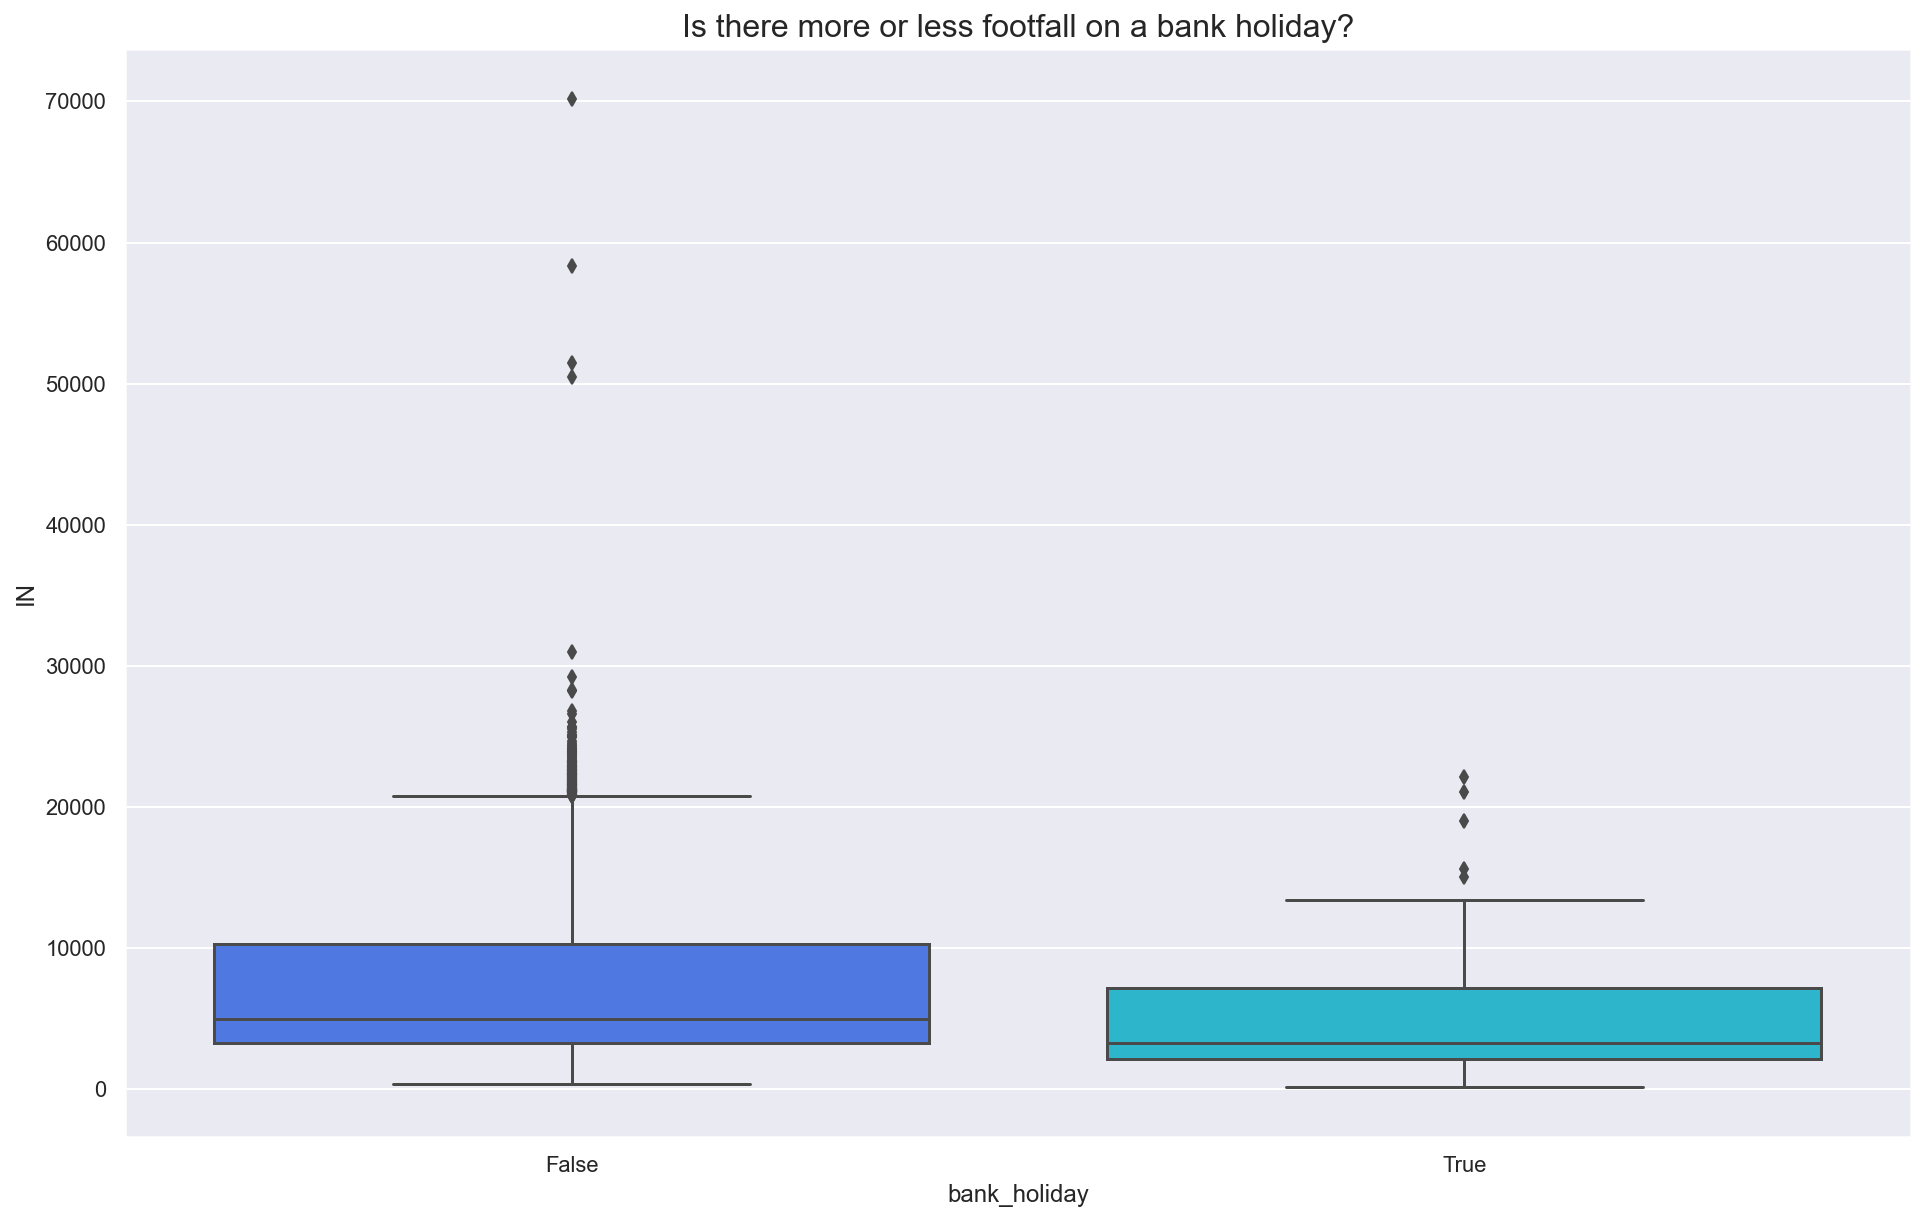

In [73]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 10)); 
    
sns.boxplot(x="bank_holiday", y="IN", data=df_new);

plt.title("Is there more or less footfall on a bank holiday?", fontsize = 16);

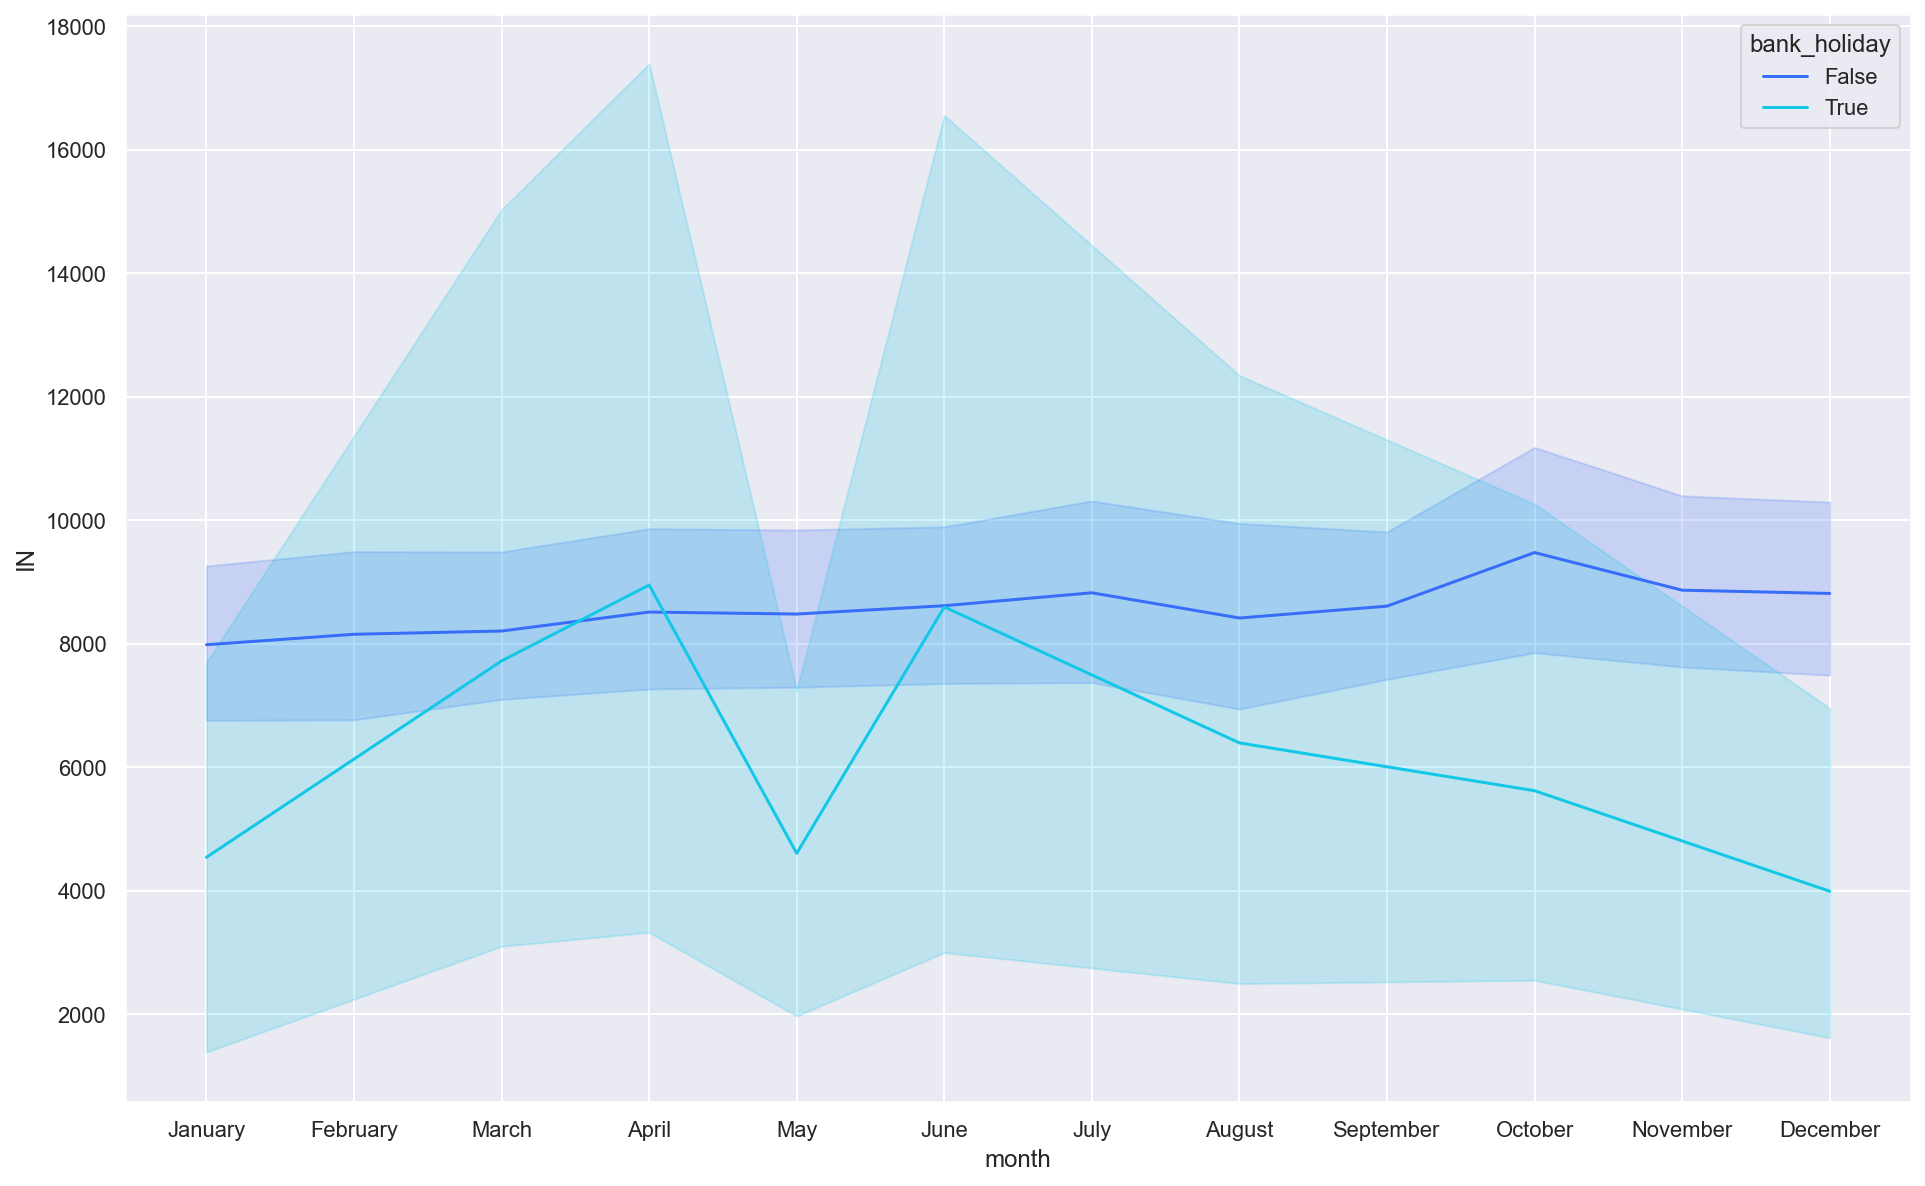

In [74]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow')
#plot size
plt.figure(figsize=(16, 10)) 

# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data=df_new, x="month", y="IN", hue="bank_holiday");

plt.title("");

### Examining weekends vs weekedays

In [75]:
# weekends
wkend_days = ['Saturday', 'Sunday']
# weekdays
wk_days = ["Monday","Tuesday","Wednesday","Thursday", "Friday"]


df_wkend = df_new[df_new['day'].isin(wkend_days)]
df_wk = df_new[df_new['day'].isin(wk_days)]

print("Weekend: IN value median", df_wkend['IN'].median())

print("Weekend: IN value mean", df_wkend['IN'].mean())

print("Week day: IN value median", df_wk['IN'].median())
print("Week day: IN value mean", df_wk['IN'].mean())

Weekend: IN value median 4872.5
Weekend: IN value mean 8231.899038461539
Week day: IN value median 4906.0
Week day: IN value mean 8621.543103448275


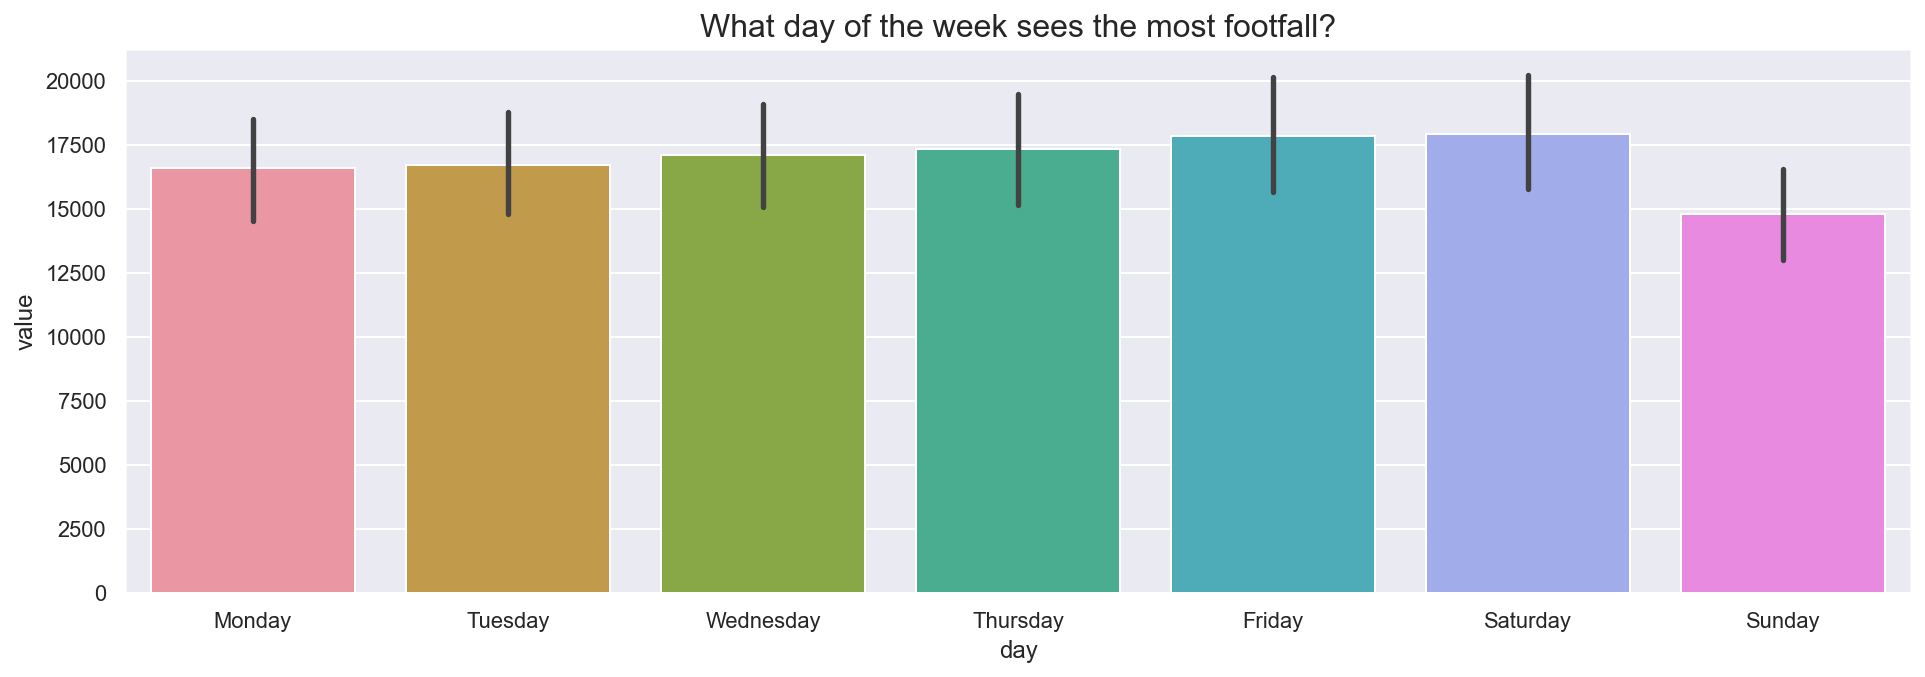

In [76]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5)); 

#bar plot of each day of the week and IN
sns.barplot(x = 'day', y = 'value', data = df_new);

plt.title("What day of the week sees the most footfall?", fontsize = 16);
#Friday and Saturday's see the most footfall

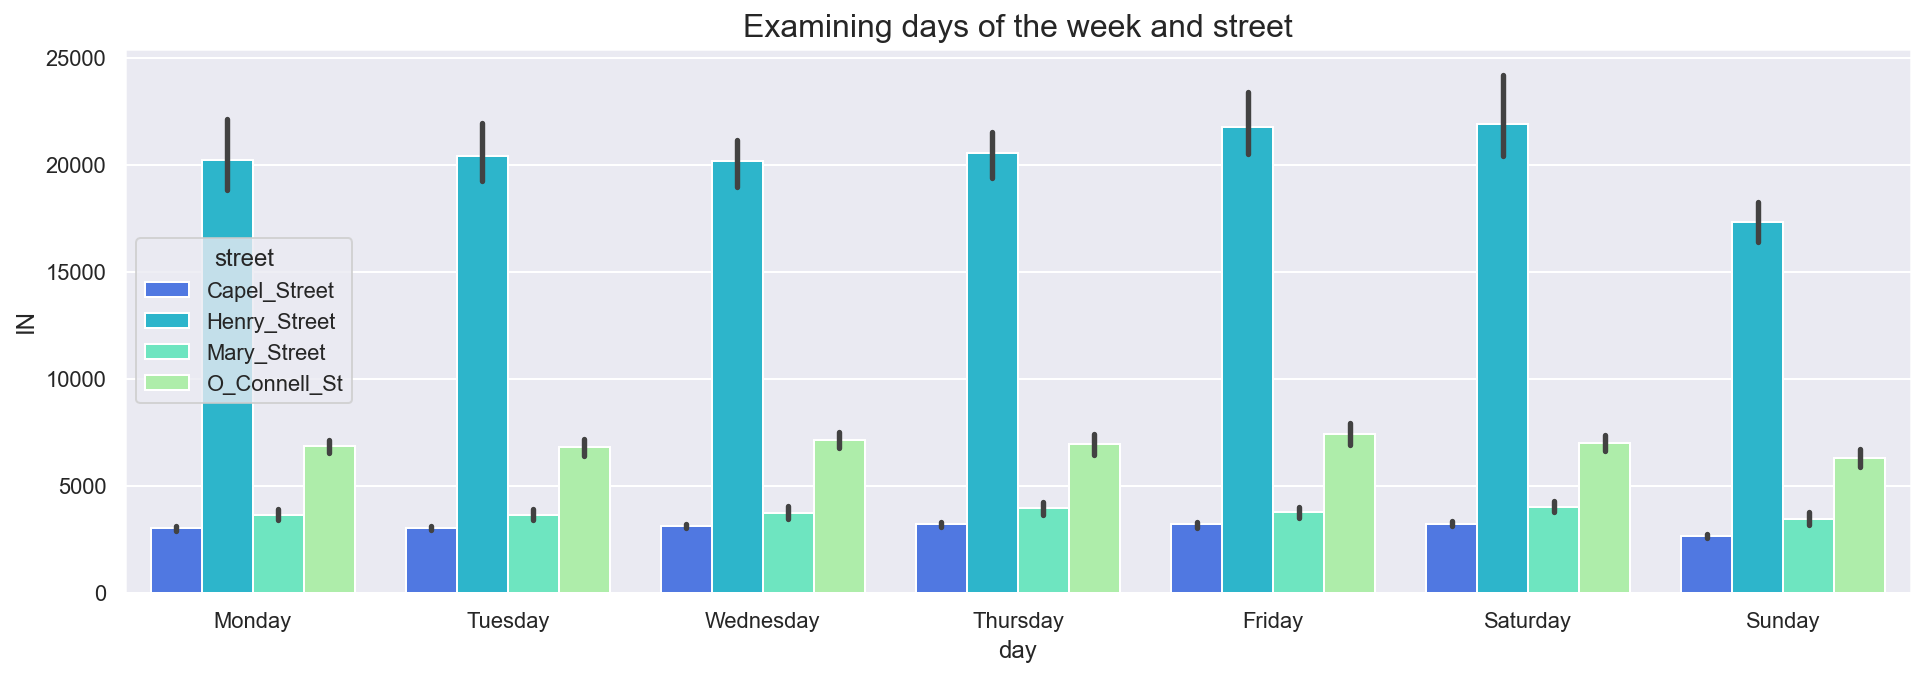

In [77]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5)); 

sns.barplot(x = 'day', y = 'IN', data = df_new, hue='street');
plt.title("Examining days of the week and street", fontsize = 16);

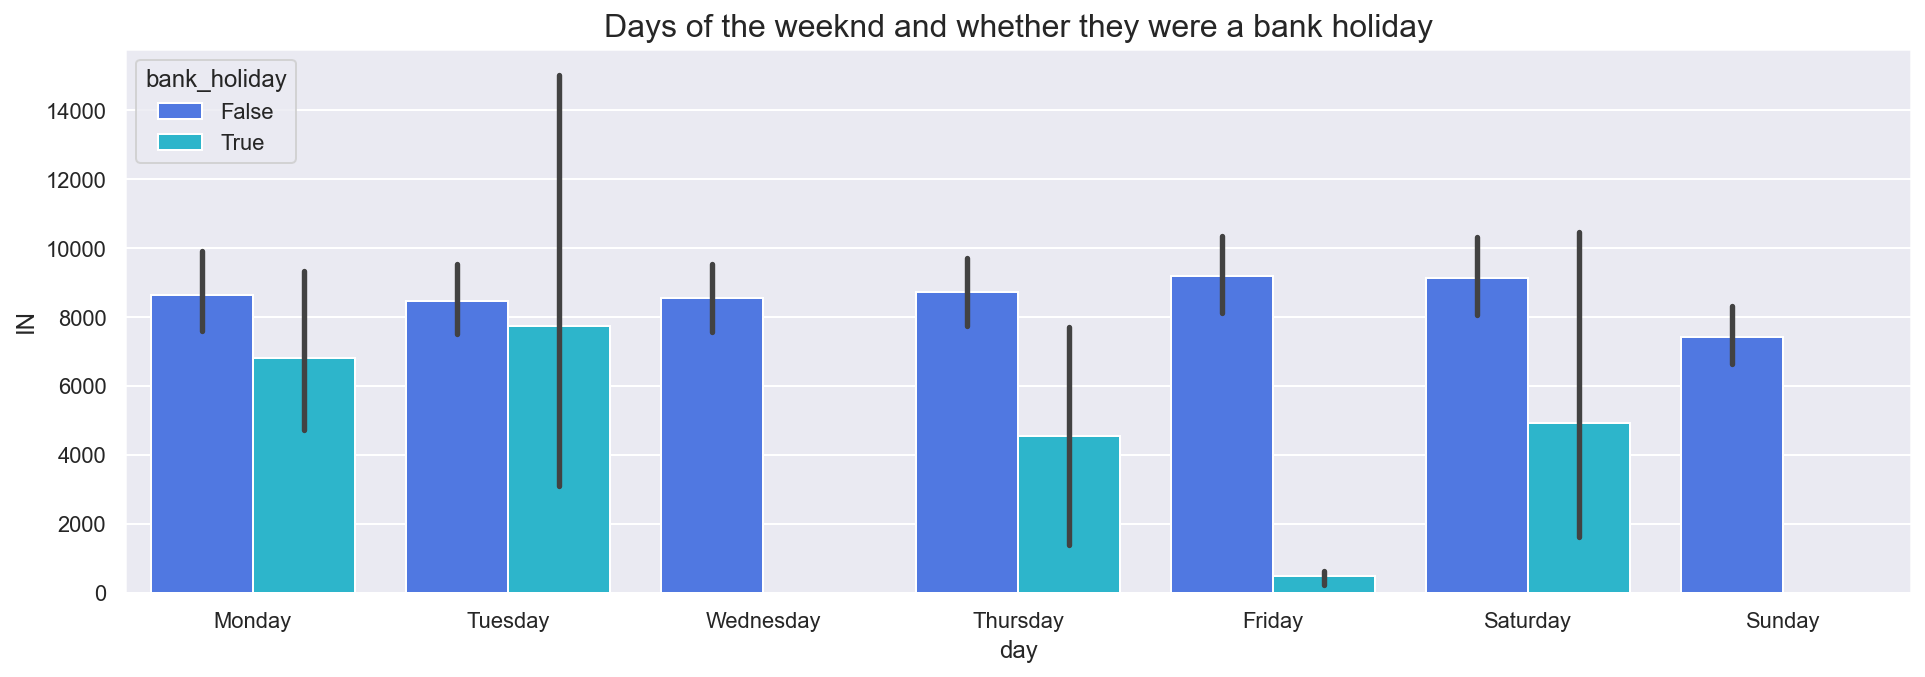

In [78]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

s1 = sns.barplot(x = 'day', y = 'IN', data = df_new, hue='bank_holiday');
plt.title("Days of the weeknd and whether they were a bank holiday", fontsize=16);

Do days closer to christmas have increase in footfall?

Box plots are good for viewing data when you have categorical data and numeric data. 


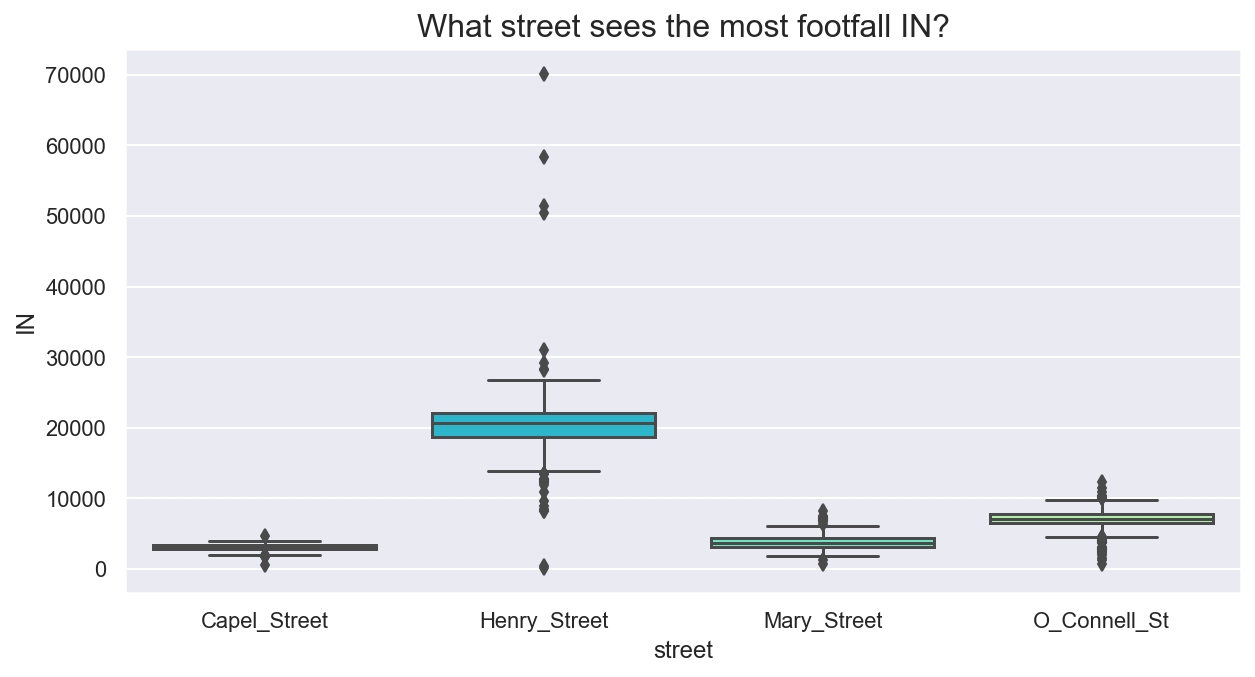

In [66]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(10, 5));  

# street vs in     
sns.boxplot(x="street", y="IN", data=df_new);
plt.title("What street sees the most footfall IN?", fontsize=16);

Henry street sees the most footfall. "IN" seems to have a lot of outliers in the data.

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='street', ylabel='OUT'>

Text(0.5, 1.0, 'What street sees the most footfall OUT?')

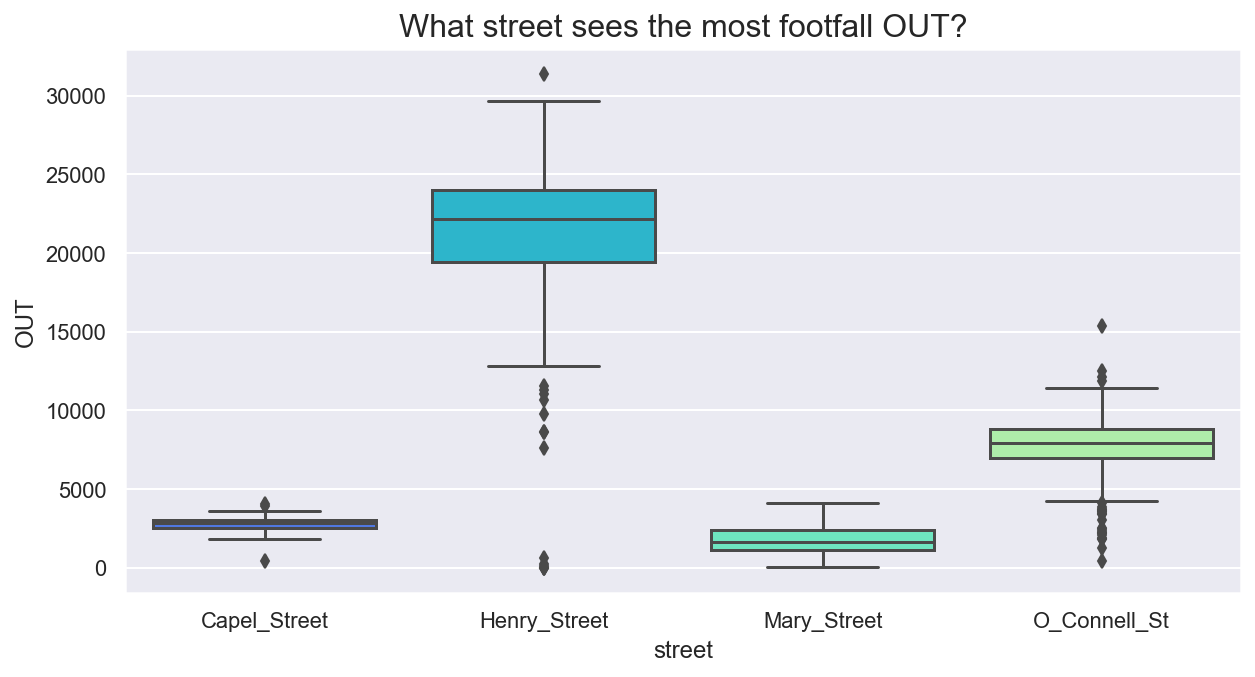

In [67]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(10, 5));      

sns.boxplot(x="street", y="OUT", data=df_new);
plt.title("What street sees the most footfall OUT?", fontsize=16)

A pairplot is an efficient way to quickly plot all the variables, identify relationships between variables and see variable distributions. From the pairplots below, the most interesting one is the first pairplot which looks at the variables and shows the street as Hue. You can clearly see that that the dataset would be suitable for clustering and linear regression. There might be an issue with overlapping variables as I can't see Henry or capel street on the plots for week, tavg, tmin, tmax, prcp. 

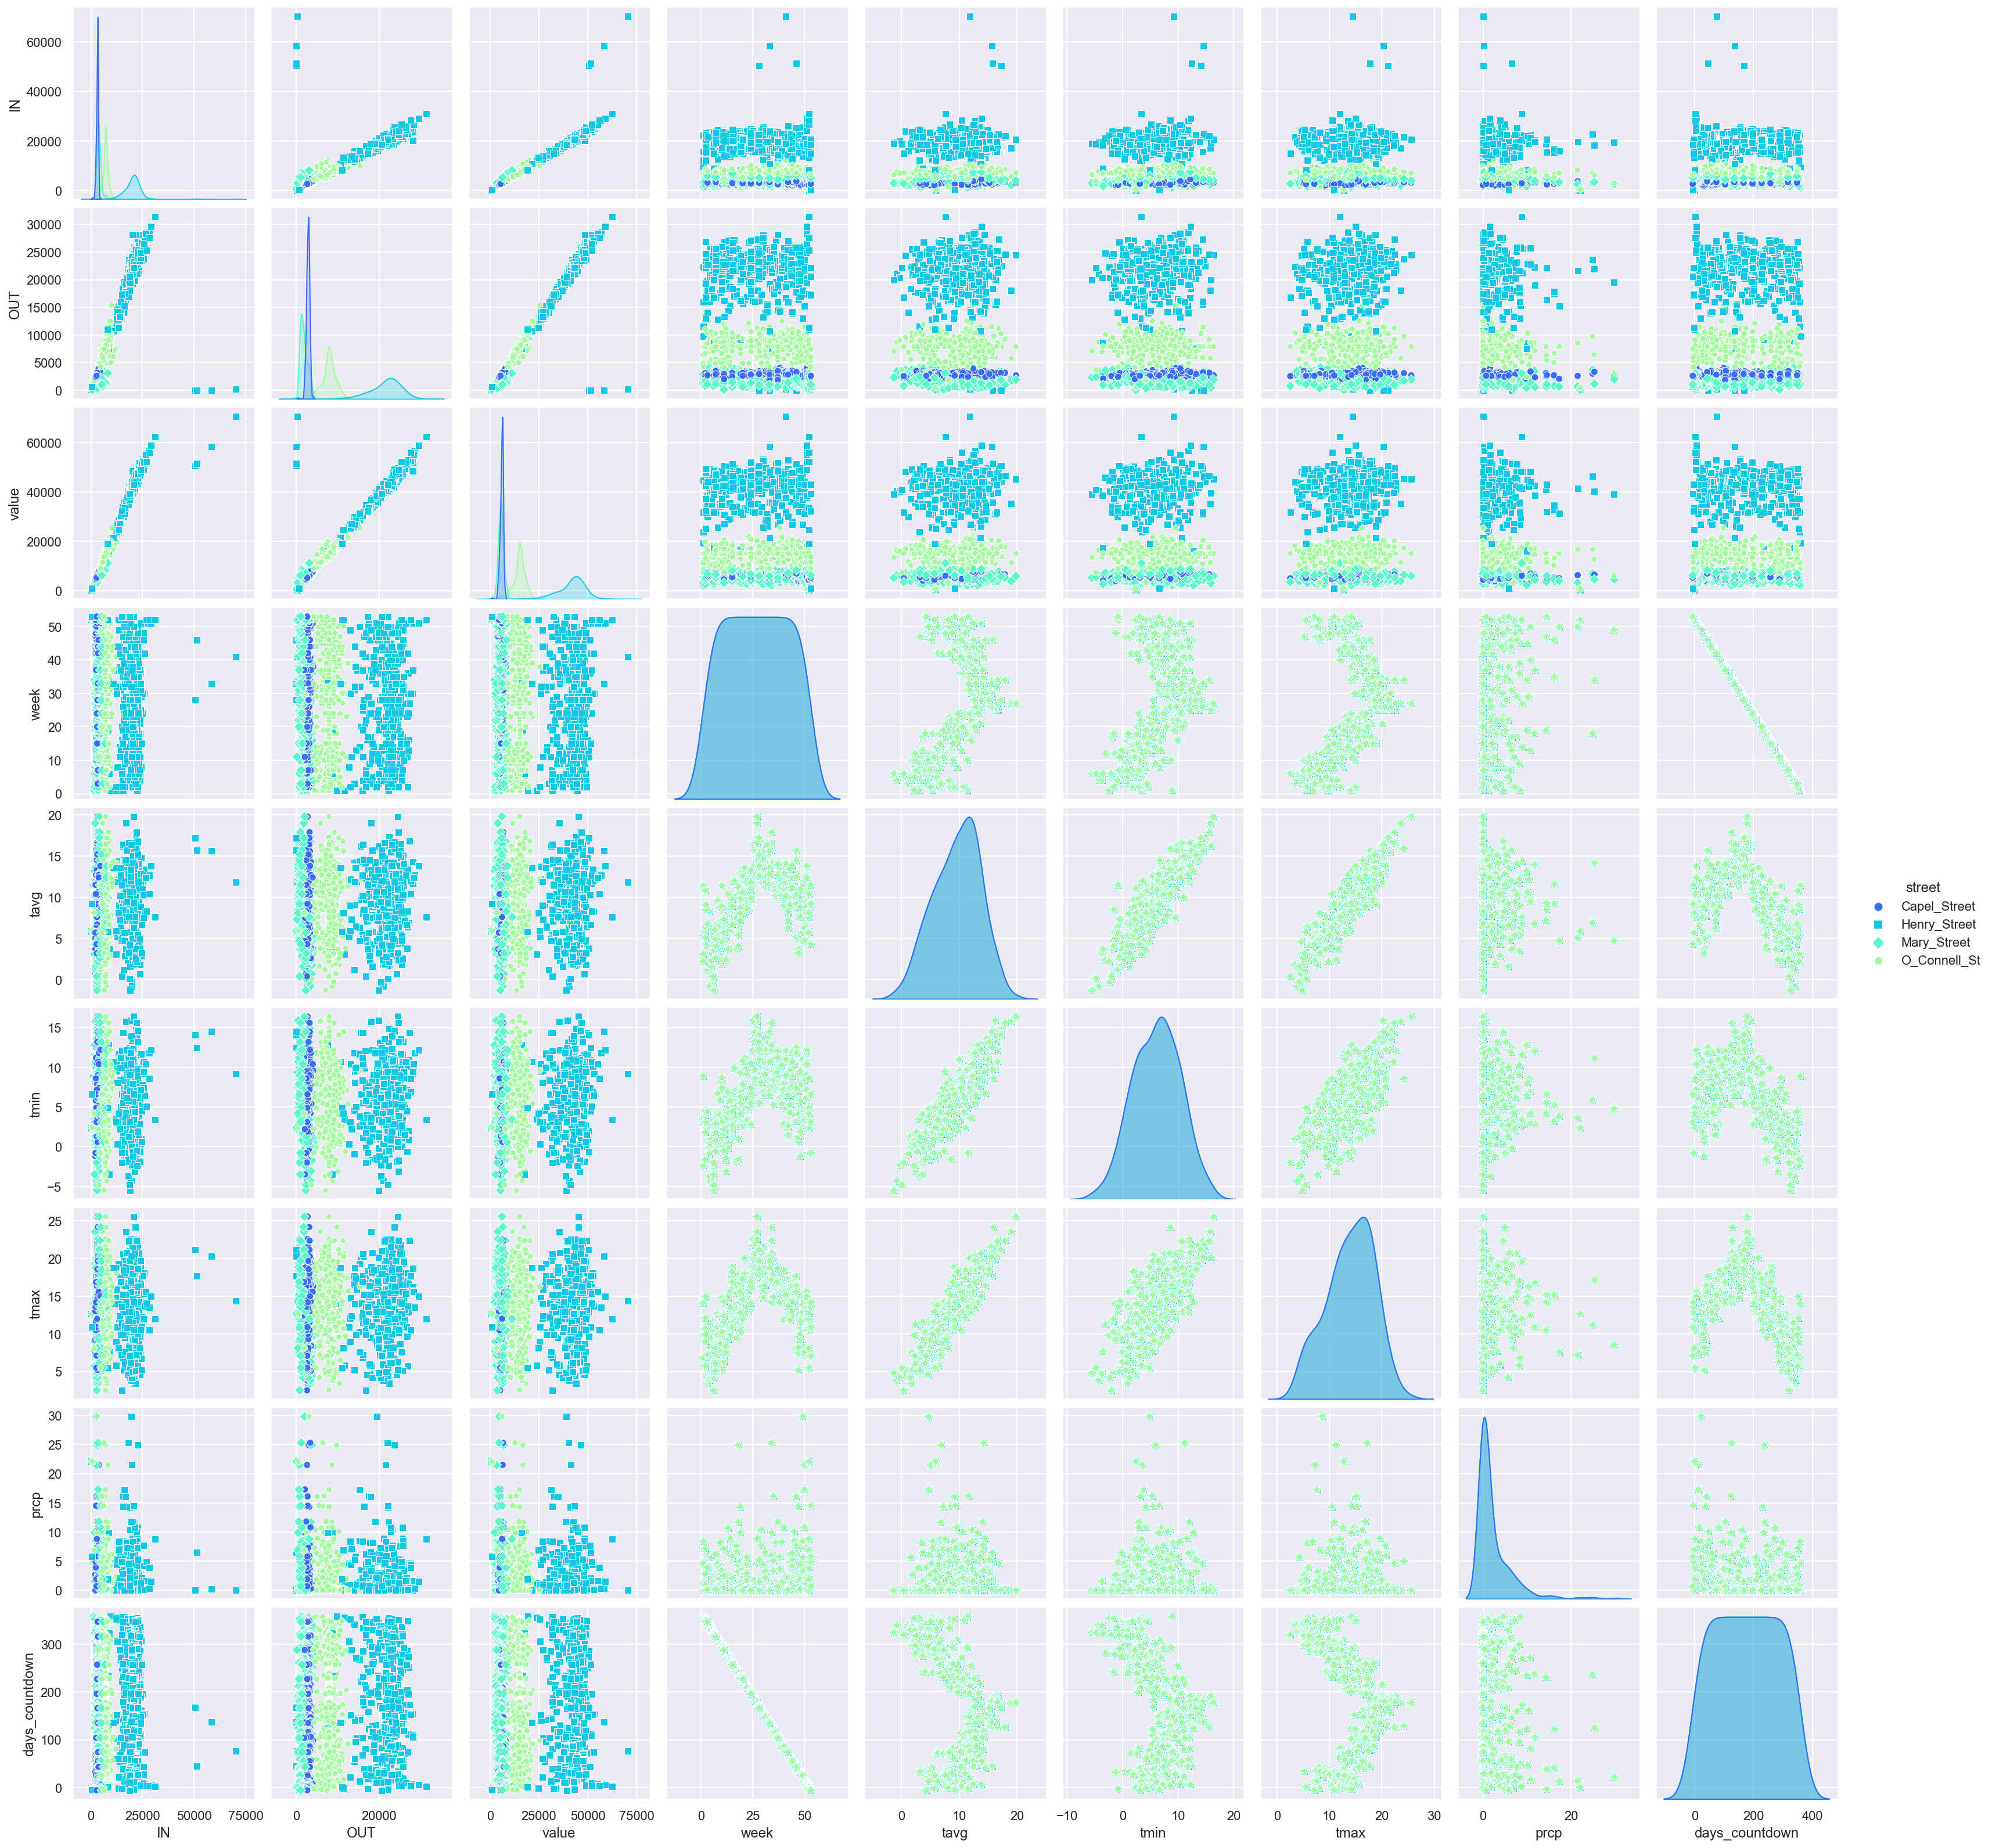

In [81]:
#dropping the boolean as it is causing error for the pairpot
df_no_bool = df_new[df_new.columns.drop(['bank_holiday'])]  
#markers help show the different categories on the plot
sns.pairplot(df_no_bool, hue="street", markers=["o", "s", "D", "p"])  


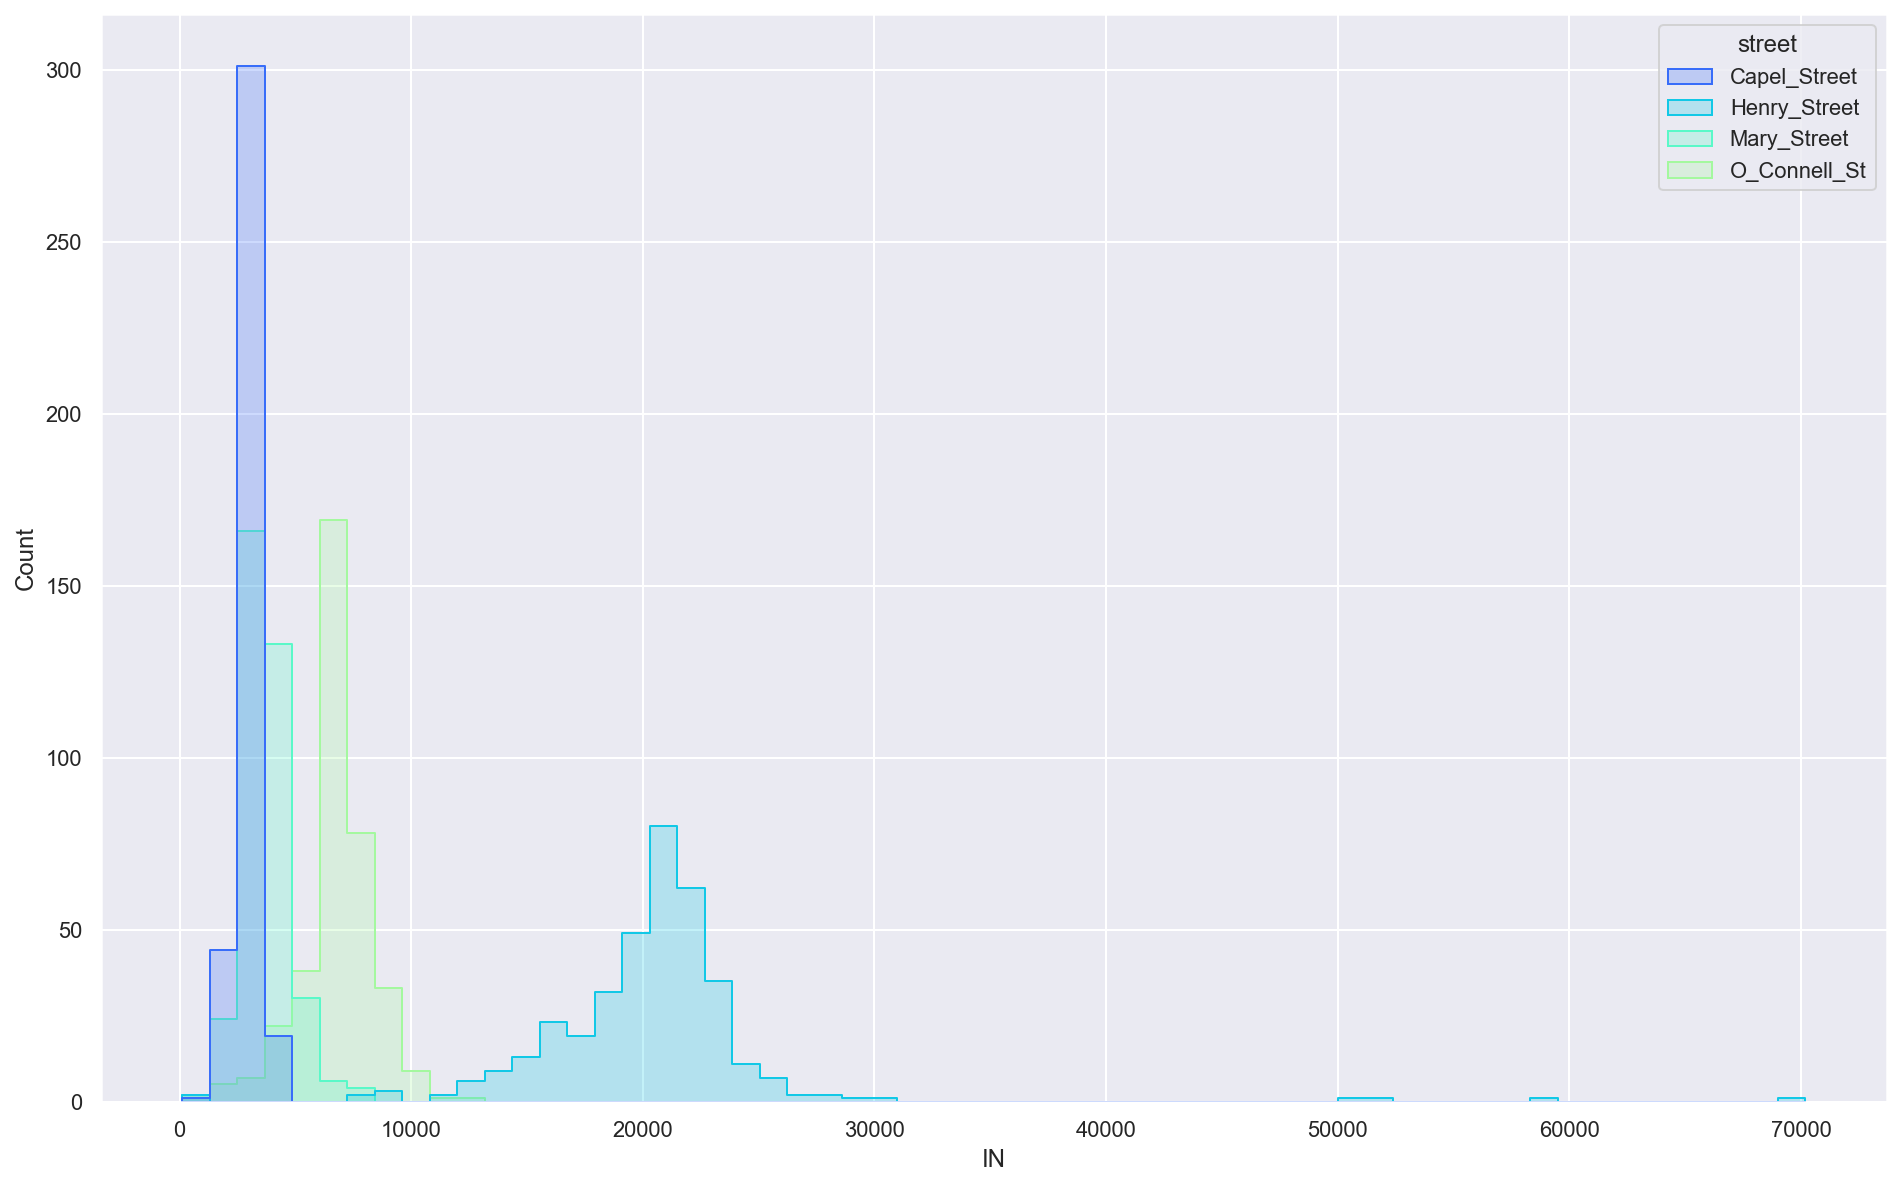

In [82]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 10));  

sns.histplot(df_new, x="IN", hue="street", element="step");   
plt.show();

### Plot time series

In [83]:
df_new.head()

Date      IN     OUT        street    value       day     month  week  \
0 2015-01-01  1593.0  1888.0  Capel_Street   3481.0  Thursday   January     1   
1 2015-01-01  9520.0  9801.0  Henry_Street  19321.0  Thursday   January     1   
2 2015-01-01  1188.0  1069.0   Mary_Street   2257.0  Thursday   January     1   
3 2015-01-01  5879.0  4882.0  O_Connell_St  10761.0  Thursday   January     1   
4 2015-02-01  2150.0  2287.0  Capel_Street   4437.0    Sunday  February     5   

   tavg  tmin  tmax  prcp  bank_holiday  days_countdown  
0  11.4   8.9  14.1   4.6          True             358  
1  11.4   8.9  14.1   4.6          True             358  
2  11.4   8.9  14.1   4.6          True             358  
3  11.4   8.9  14.1   4.6          True             358  
4   0.7  -1.9   4.6   0.0         False             327

In [84]:
import seaborn as sns
# Set the date column as index column.
df2 = df_new.groupby(['month','day'])['IN'].sum()
df2


month     day      
January   Monday       136210.0
          Tuesday      115905.0
          Wednesday    127171.0
          Thursday     151588.0
          Friday       168057.0
                         ...   
December  Wednesday    182928.0
          Thursday     162912.0
          Friday       108829.0
          Saturday     133644.0
          Sunday       139045.0
Name: IN, Length: 84, dtype: float64

### What is the busiest day of the week?

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# by street
df_month = df_new.pivot_table(index="month", columns="day", values="IN", aggfunc=np.sum)

df_month

day          Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
month                                                                    
January    136210.0  115905.0   127171.0  151588.0  168057.0  163496.0   
February   125378.0  134259.0   129528.0  130952.0  144775.0  139609.0   
March      170147.0  165347.0   137300.0  116667.0  147648.0  142194.0   
April      134386.0  141589.0   158660.0  183315.0  139357.0  138493.0   
May        121386.0  129649.0   139803.0  132544.0  175938.0  180317.0   
June       175373.0  171557.0   138083.0  152712.0  137861.0  145997.0   
July       122990.0  134297.0   171810.0  175910.0  215659.0  151146.0   
August     205012.0  120307.0   128882.0  134361.0  144936.0  171254.0   
September  140713.0  164662.0   172916.0  146538.0  155600.0  140480.0   
October    129263.0  144509.0   151204.0  187908.0  186139.0  232521.0   
November   162347.0  158954.0   139236.0  159019.0  151713.0  140792.0   
December   128612.0  179580.0   182928.0  162912.0  108829.0  133644.0   

day          Sunday  
month                
January    114258.0  
February   109051.0  
March      136752.0  
April      127974.0  
May        156941.0  
June       112669.0  
July       122953.0  
August     131263.0  
September  112576.0  
October    128591.0  
November   152454.0  
December   139045.0

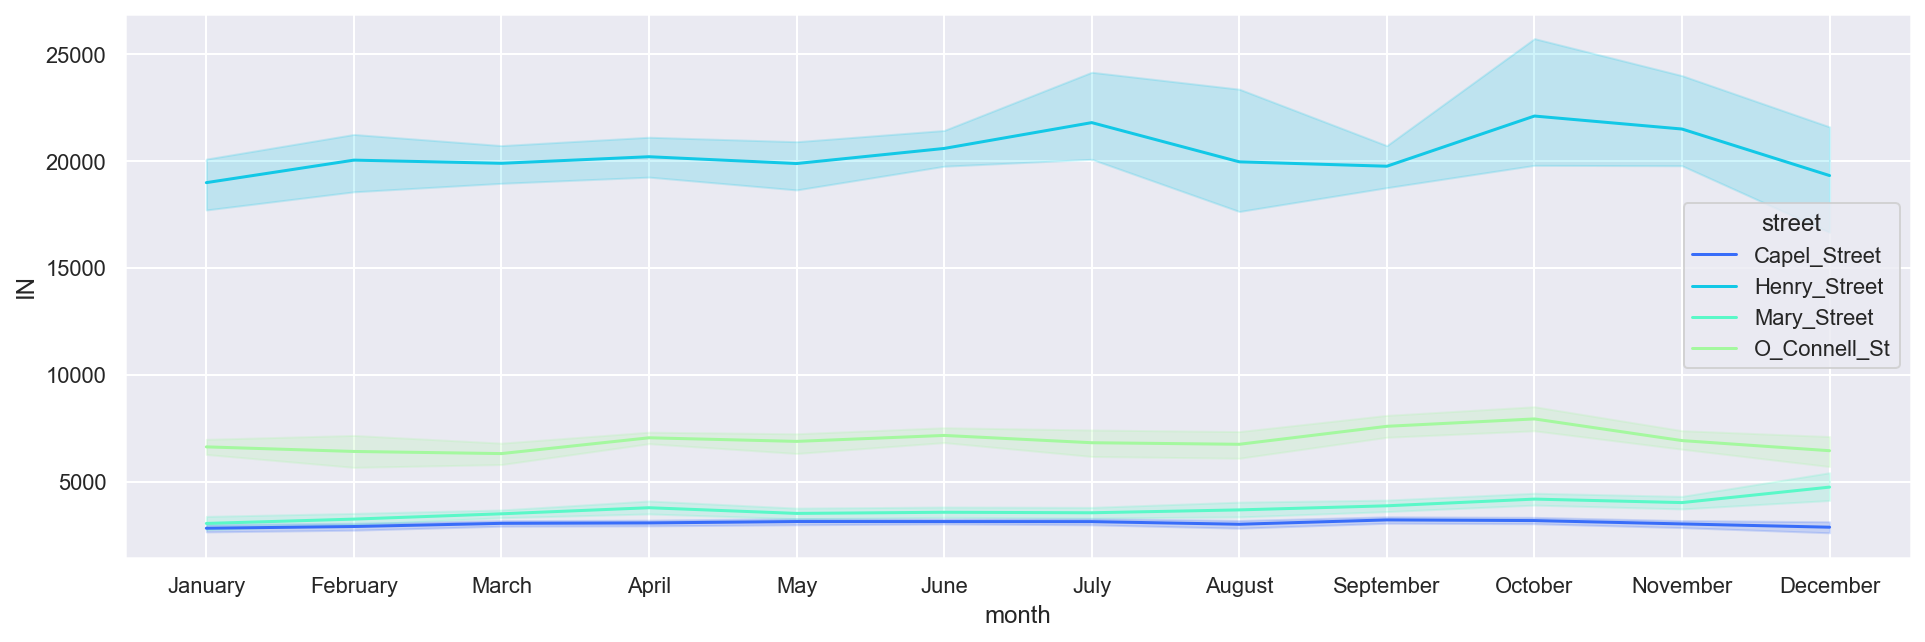

In [86]:
#mean and 95% confidence interval
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.lineplot(data=df_new, x="month", y="IN", hue="street");

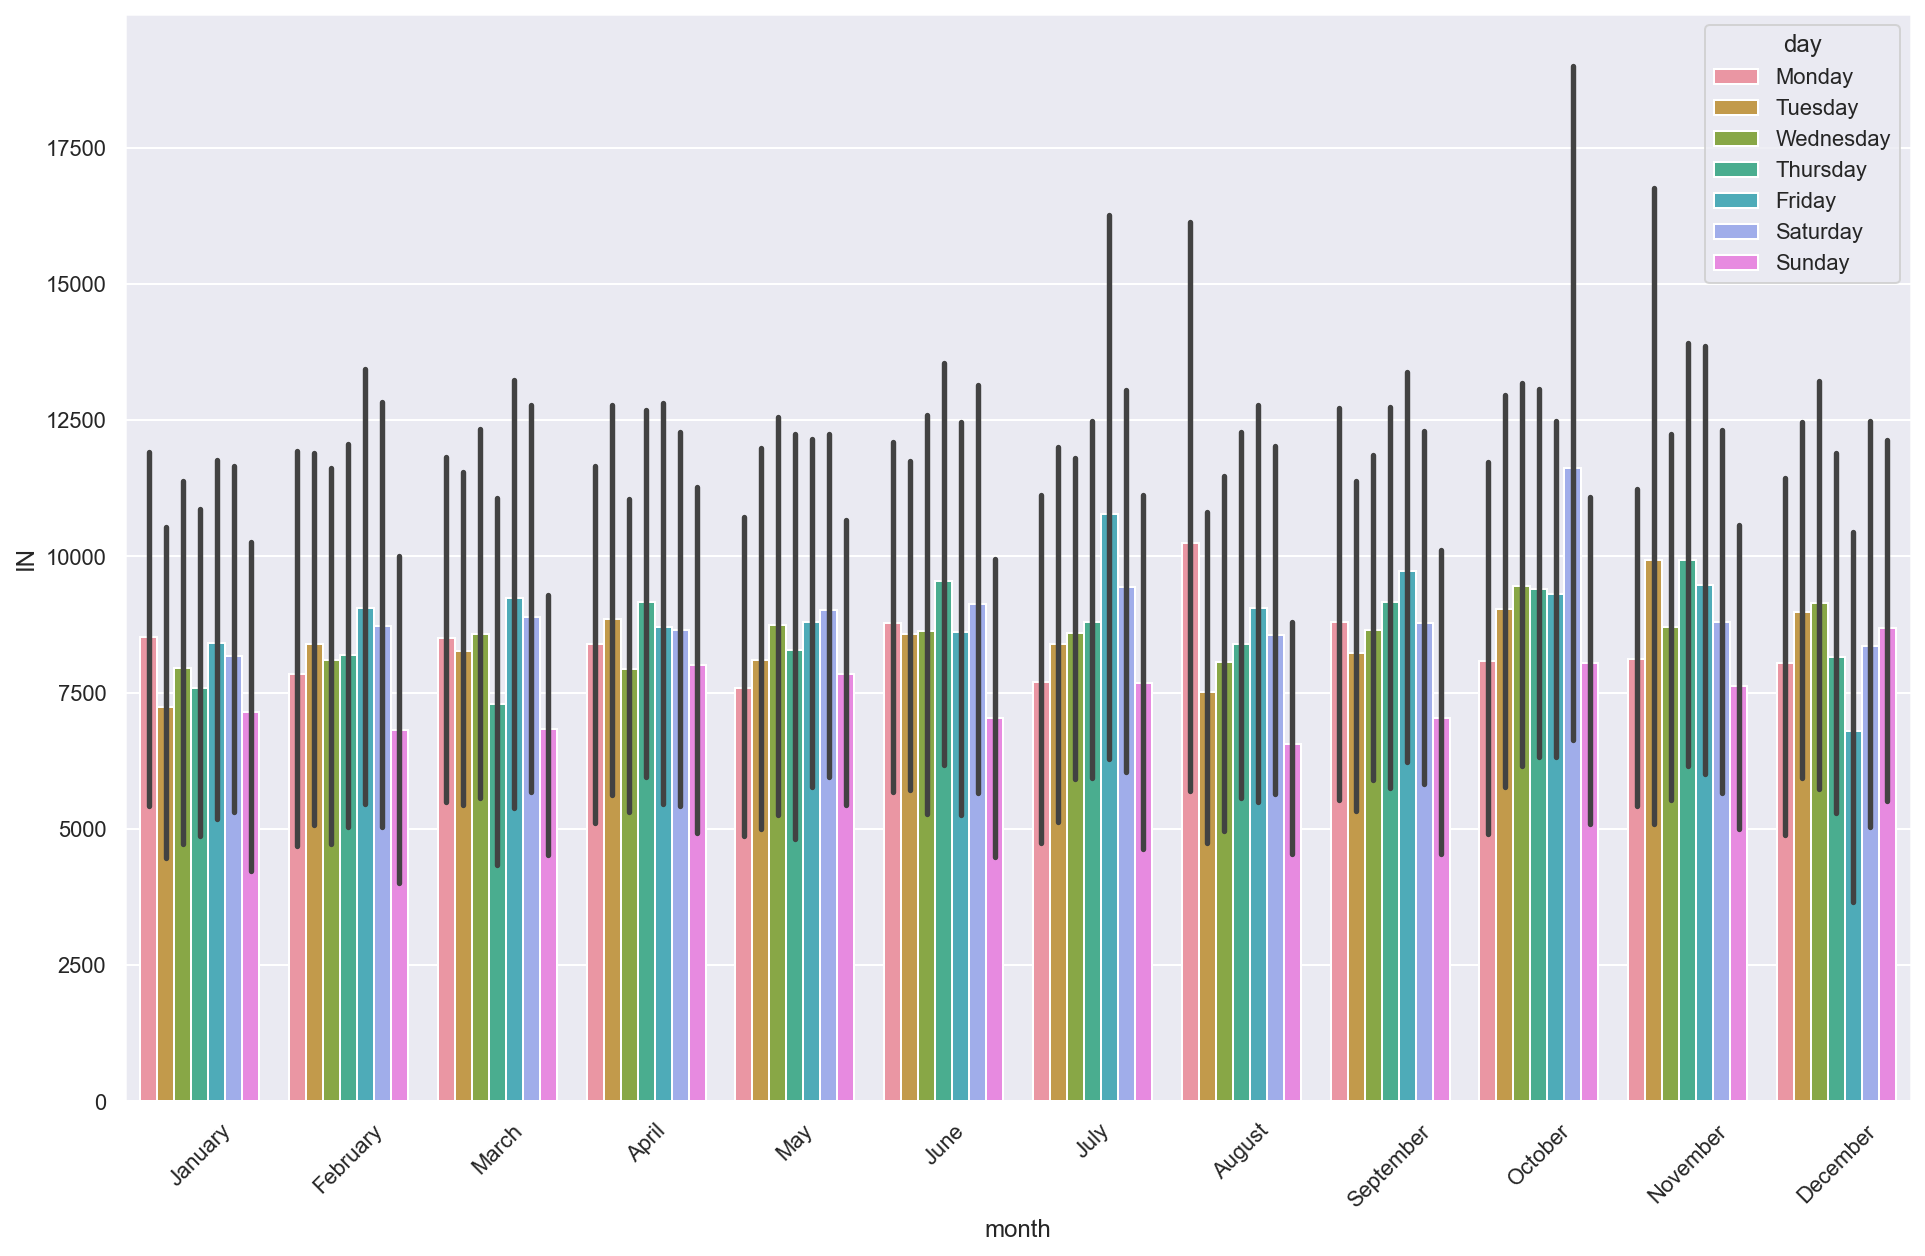

In [87]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 10));  

sns.barplot(x = 'month', y = 'IN', data = df_new, hue='day');

#rotate x-axis labels
plt.xticks(rotation=45);

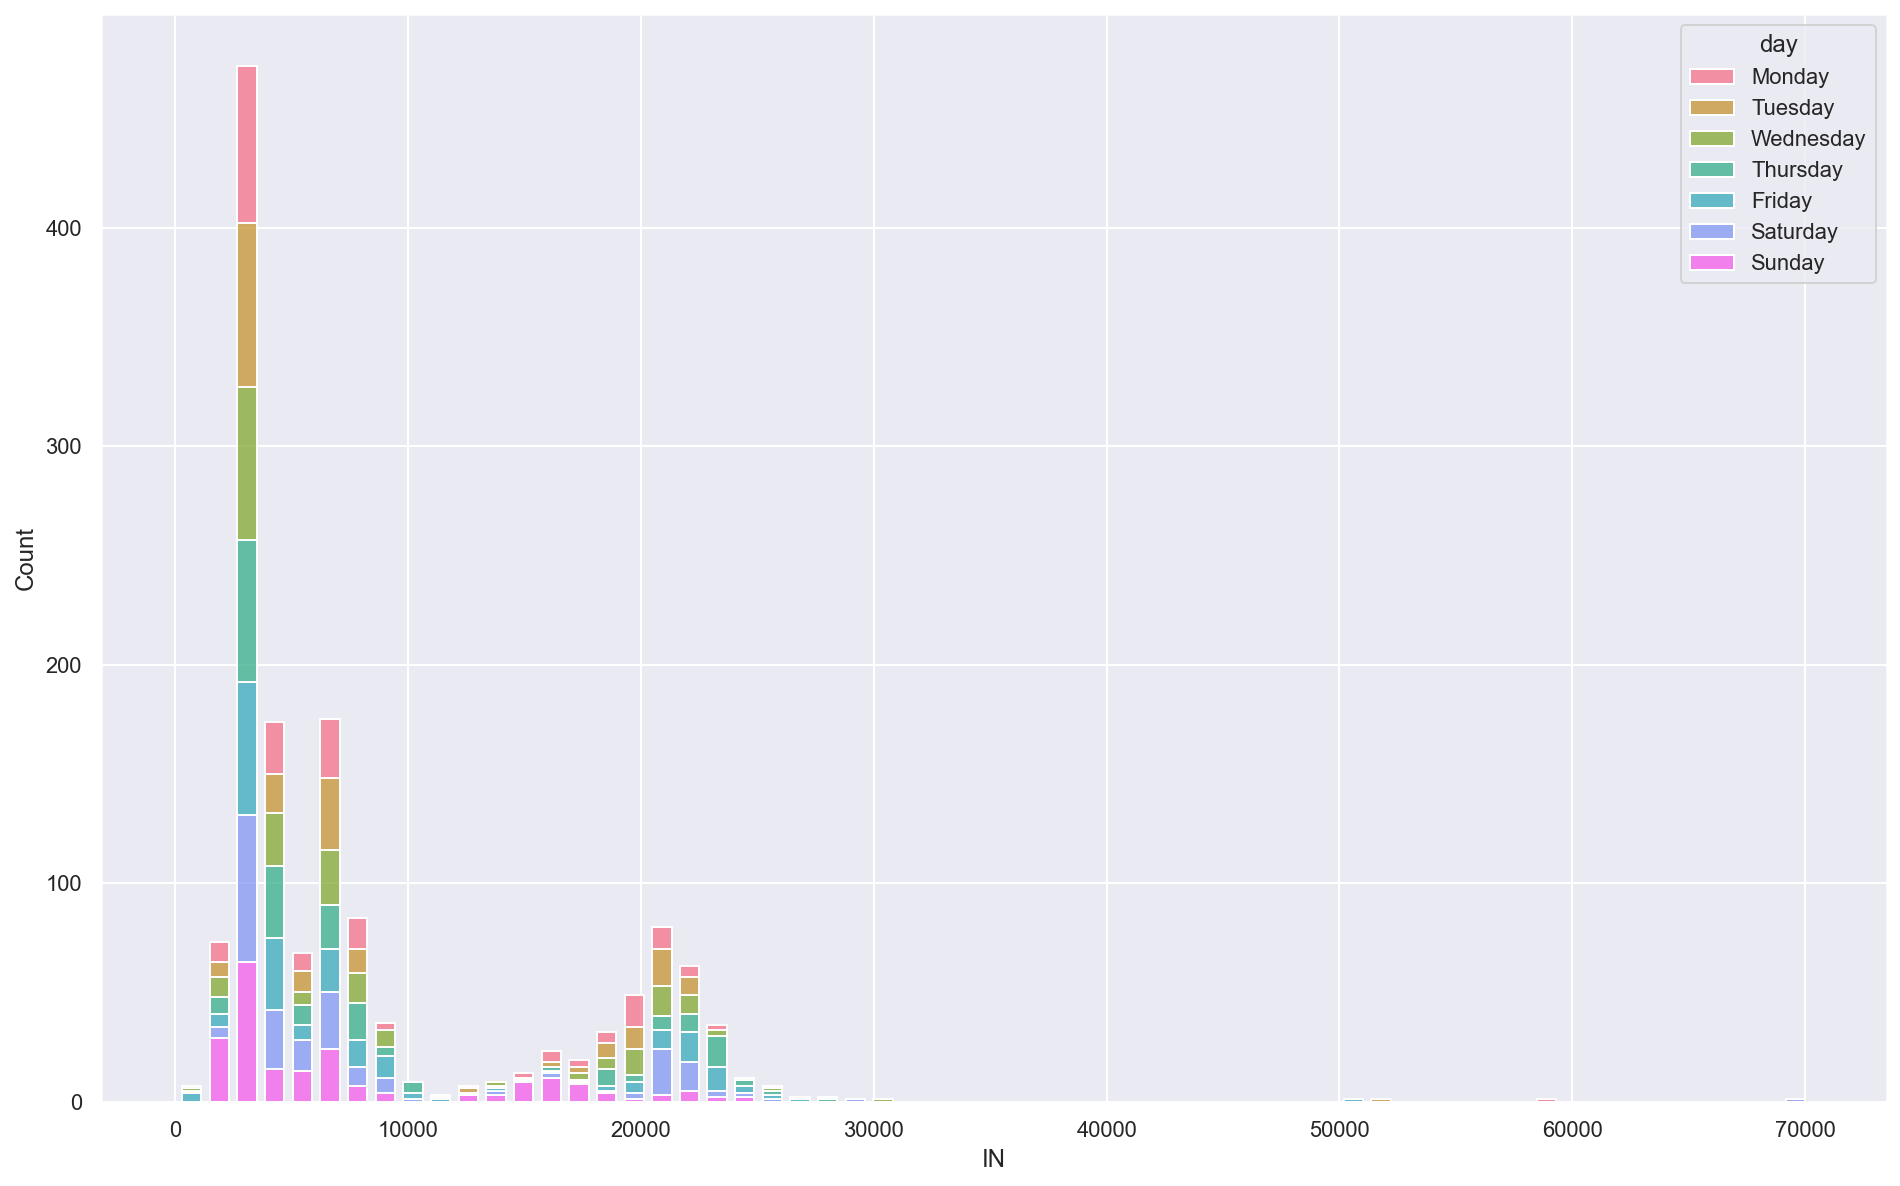

In [88]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 10));  

sns.histplot(x = 'IN' , hue = 'day',multiple = 'stack',data=df_new,shrink = 0.7);

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# by street
df_street = df_new.pivot_table(index="street", columns="day", values="IN", aggfunc=np.sum)
df_street

day              Monday    Tuesday  Wednesday   Thursday     Friday  \
street                                                                
Capel_Street   156273.0   156420.0   162243.0   168956.0   165483.0   
Henry_Street  1051382.0  1060700.0  1049546.0  1089458.0  1130890.0   
Mary_Street    188403.0   189499.0   193862.0   208583.0   195305.0   
O_Connell_St   355759.0   353996.0   371870.0   367429.0   384834.0   

day            Saturday    Sunday  
street                             
Capel_Street   167775.0  137001.0  
Henry_Street  1139677.0  901384.0  
Mary_Street    208319.0  179466.0  
O_Connell_St   364172.0  326676.0

Sunday is the quietest day of the week

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:xlabel='day', ylabel='IN'>

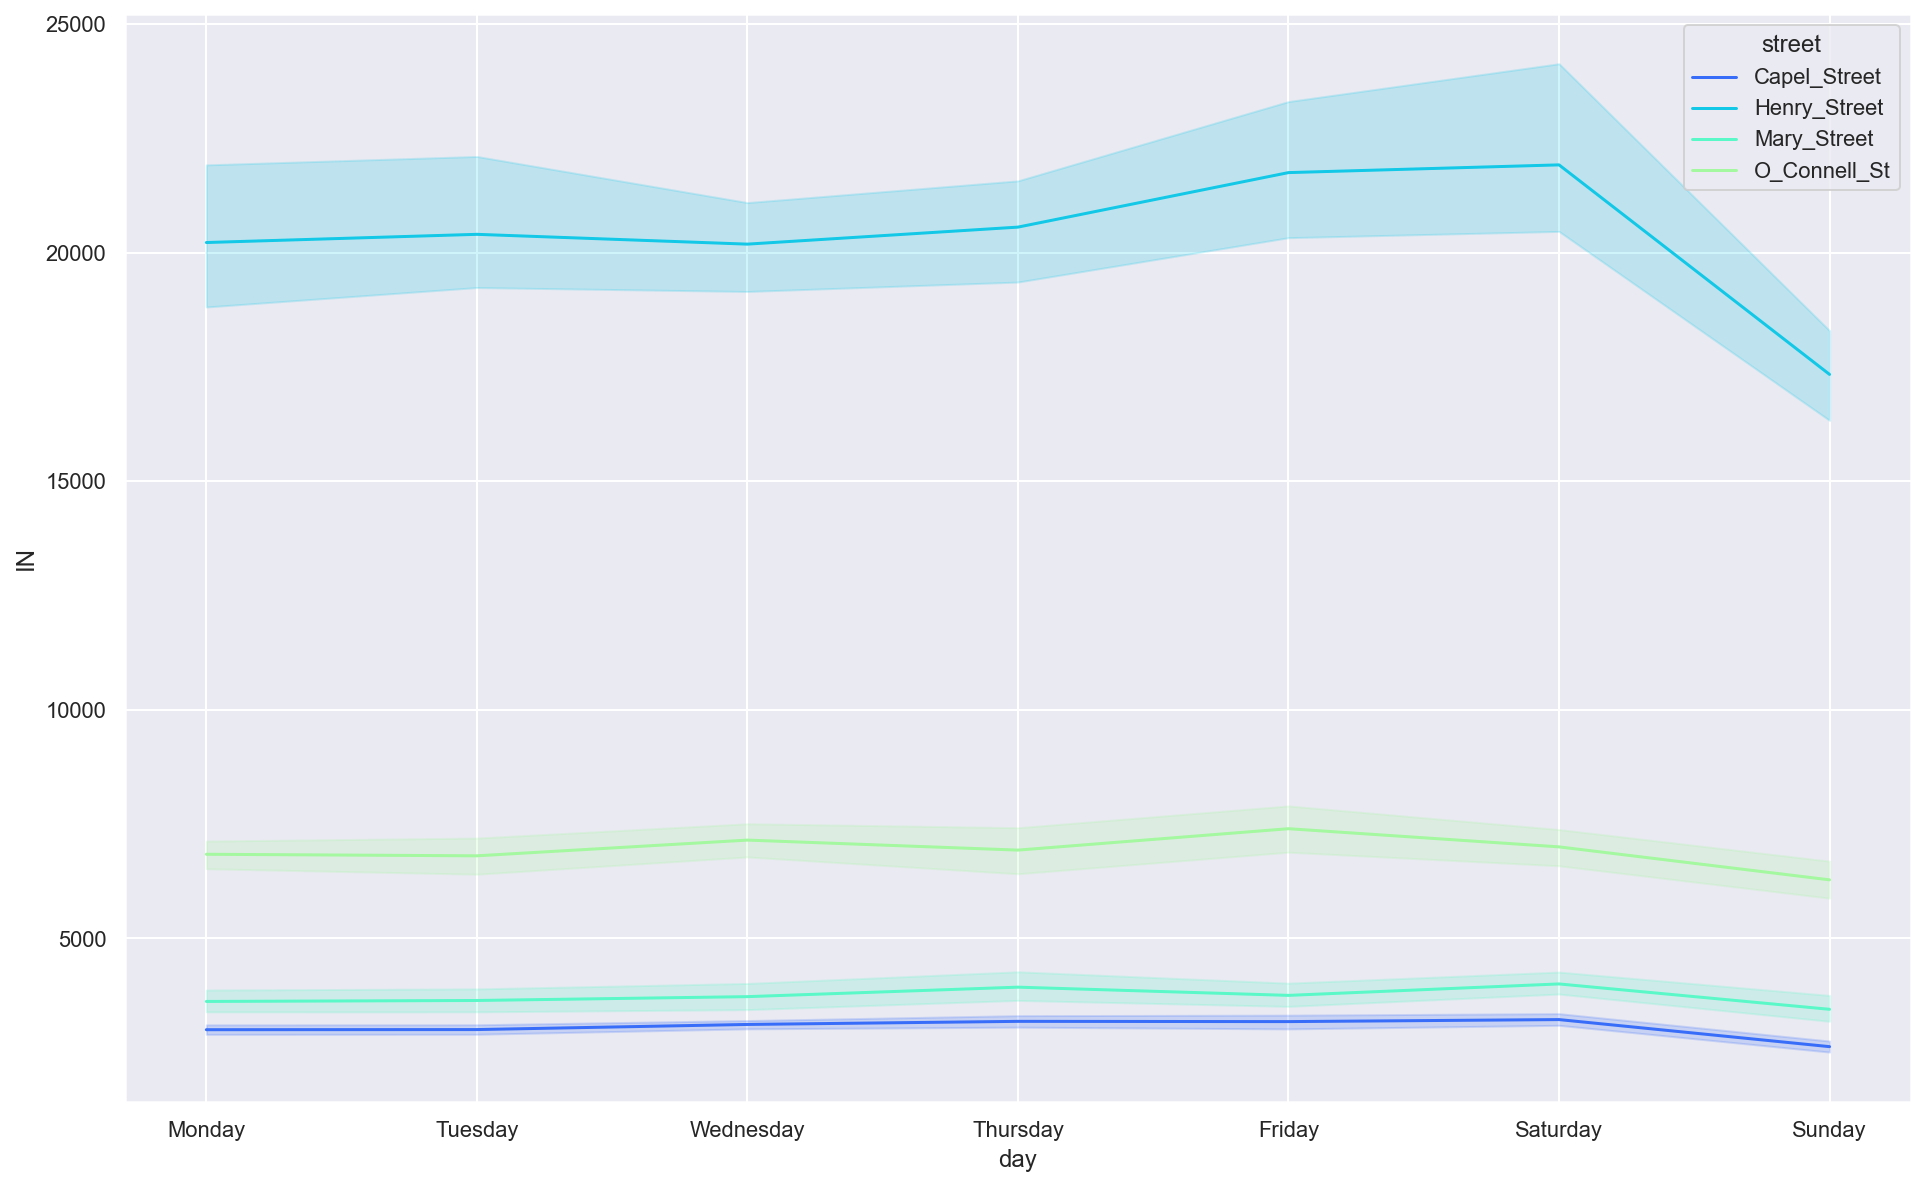

In [90]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 10));  

#mean and 95% confidence interval
sns.lineplot(data=df_new, x="day", y="IN", hue="street")

### Poisson Distribution
Use possion to determine the probility of seeing a footfall of 50 on a Monday in Capel_Street!

get the average for monday in henry street

In [91]:
#Selecting the columns to add to the dataset
df_poisson = df_new[['IN','street', 'day']]
#filtering to capel street
df_poisson = df_poisson[df_poisson['street']=='Capel_Street']
#filtering to Monday
df_poisson  = df_poisson[df_poisson['day']=='Monday']
df_poisson 

IN        street     day
20    3032.0  Capel_Street  Monday
72    2898.0  Capel_Street  Monday
100   2848.0  Capel_Street  Monday
128   2876.0  Capel_Street  Monday
132   3168.0  Capel_Street  Monday
164   2861.0  Capel_Street  Monday
184   3002.0  Capel_Street  Monday
212   2612.0  Capel_Street  Monday
264   2307.0  Capel_Street  Monday
296   3353.0  Capel_Street  Monday
324   2972.0  Capel_Street  Monday
352   2551.0  Capel_Street  Monday
376   1999.0  Capel_Street  Monday
408   3288.0  Capel_Street  Monday
436   3094.0  Capel_Street  Monday
464   2764.0  Capel_Street  Monday
480   3236.0  Capel_Street  Monday
516   2374.0  Capel_Street  Monday
548   3091.0  Capel_Street  Monday
576   3171.0  Capel_Street  Monday
616   3365.0  Capel_Street  Monday
628   2593.0  Capel_Street  Monday
660   3198.0  Capel_Street  Monday
688   3118.0  Capel_Street  Monday
716   3265.0  Capel_Street  Monday
756   3392.0  Capel_Street  Monday
768   2482.0  Capel_Street  Monday
772   3133.0  Capel_Street  Monday
800   2882.0  Capel_Street  Monday
828   2880.0  Capel_Street  Monday
868   3369.0  Capel_Street  Monday
912   3159.0  Capel_Street  Monday
940   3662.0  Capel_Street  Monday
968   2992.0  Capel_Street  Monday
976   2979.0  Capel_Street  Monday
980   3404.0  Capel_Street  Monday
1012  3178.0  Capel_Street  Monday
1024  3263.0  Capel_Street  Monday
1052  3814.0  Capel_Street  Monday
1080  3216.0  Capel_Street  Monday
1120  3413.0  Capel_Street  Monday
1164  3184.0  Capel_Street  Monday
1192  2110.0  Capel_Street  Monday
1232  3285.0  Capel_Street  Monday
1276  2907.0  Capel_Street  Monday
1304  2085.0  Capel_Street  Monday
1332  3253.0  Capel_Street  Monday
1336  3223.0  Capel_Street  Monday
1372  3425.0  Capel_Street  Monday
1388  2949.0  Capel_Street  Monday
1416  3344.0  Capel_Street  Monday
1444  2254.0  Capel_Street  Monday

In [92]:
mean = df_poisson['IN'].mean() 
print("The average footfall on Capel Street on Mondays:", mean)

The average footfall on Capel Street on Mondays: 3005.25


In [93]:
standdev = df_poisson['IN'].std() 
print("standdev:", standdev)

standdev: 397.23460125141736


<Figure size 1152x720 with 0 Axes>

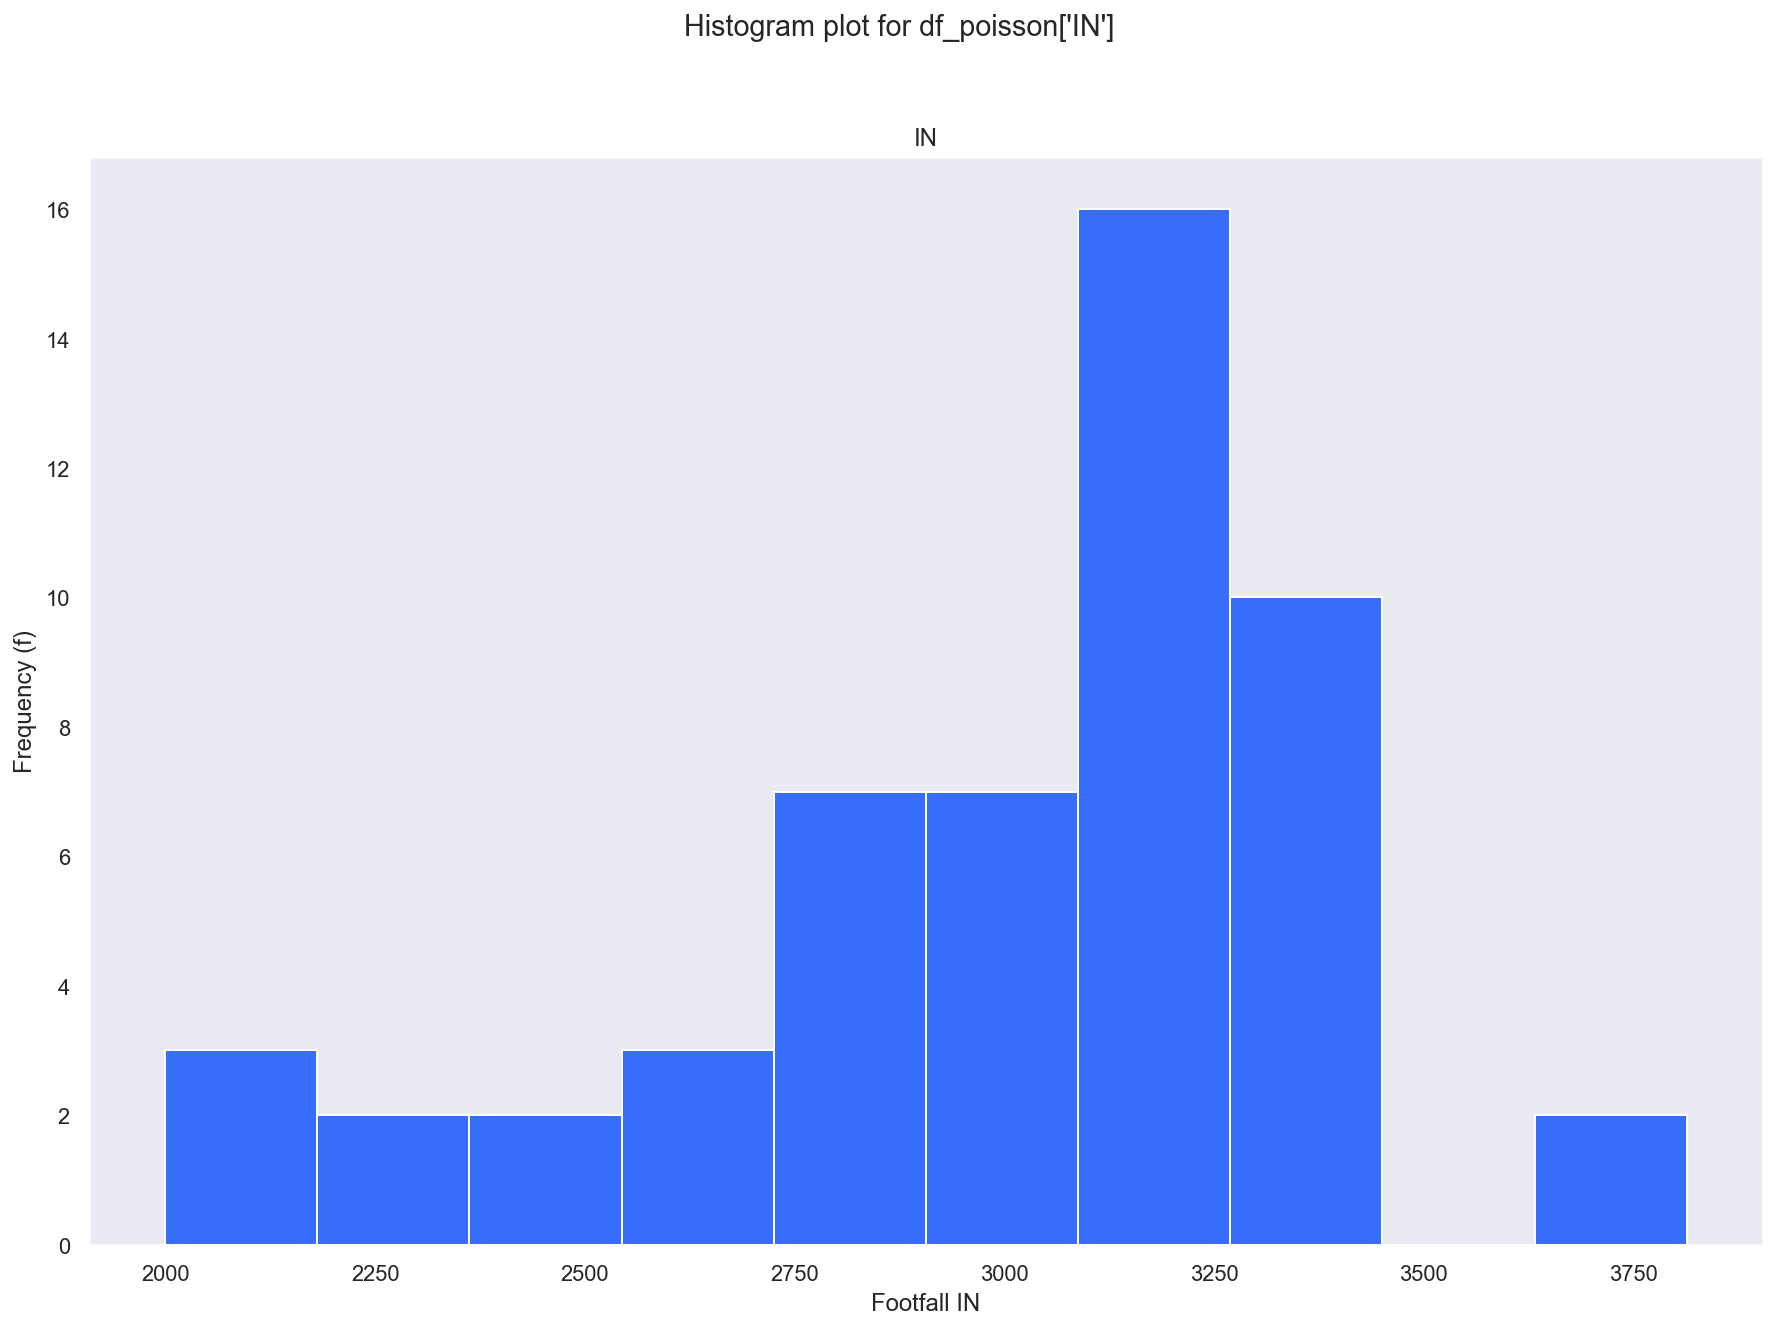

In [94]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 10));  

df_poisson = df_poisson.select_dtypes(include=np.number)

df_poisson.hist( figsize=(15, 10), grid=False); 
#sns.histplot(df_new, kde=True, color ='green')
plt.suptitle("Histogram plot for df_poisson['IN']"); 

plt.ylabel('Frequency (f)')
plt.xlabel('Footfall IN');

plt.show();

### Normal Distribution

<Figure size 1152x720 with 0 Axes>

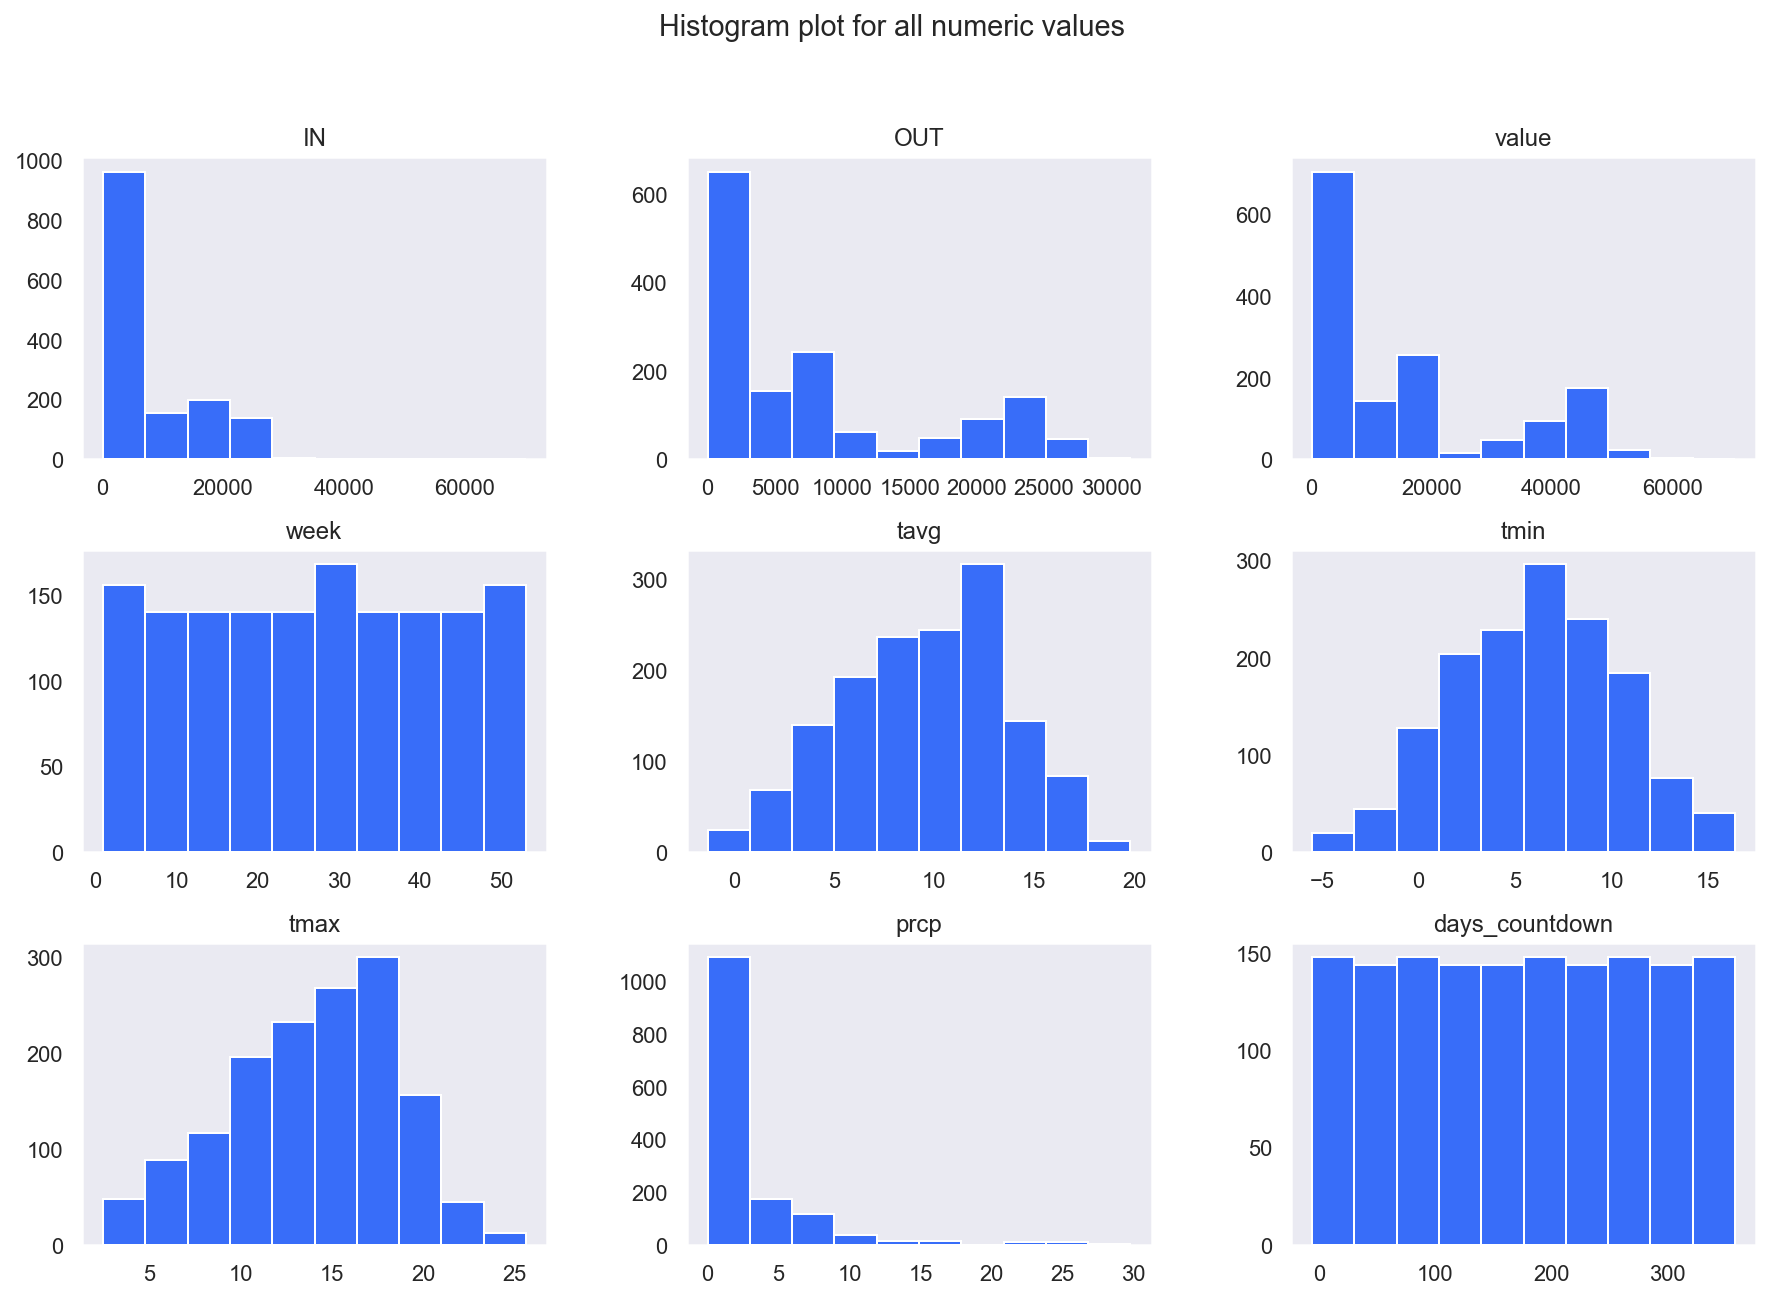

In [95]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 10));  

df_num = df_new.select_dtypes(include=np.number)

df_num.hist( figsize=(15, 10), grid=False); 
#sns.histplot(df_new, kde=True, color ='green')
plt.suptitle("Histogram plot for all numeric values"); 


plt.show();

Because I wanted to exclude any duplicate created by merging the datasets, I will filter to capel street. 

In [96]:
#Selecting the columns to add to the dataset
df_normal = df_new[['IN','street', 'tmax']]
#filtering to capel street to reduce duplicates in the dataset
df_normal = df_normal[df_normal['street']=='Capel_Street']

df_normal

IN        street  tmax
0     1593.0  Capel_Street  14.1
4     2150.0  Capel_Street   4.6
8     2819.0  Capel_Street   5.8
12    2020.0  Capel_Street  10.3
16    3162.0  Capel_Street  10.9
...      ...           ...   ...
1440  2165.0  Capel_Street  13.0
1444  2254.0  Capel_Street  13.6
1448  2481.0  Capel_Street  14.2
1452  2546.0  Capel_Street  10.9
1456  2704.0  Capel_Street   7.1

[365 rows x 3 columns]

In [97]:
tmax_mean = df_normal['tmax'].mean()
print("The mean of tmax", round(tmax_mean, 2))

The mean of tmax 13.93


In [98]:
standarddev = df_normal['tmax'].std()
print("The standard deviation of tmax", round(standarddev, 2))

The standard deviation of tmax 4.56


In [99]:
import scipy.stats as stats

#find p-value
p_value = stats.norm.sf(abs(1.7697367))
print("Finding the P Value for 1.7697367: ", p_value)

Finding the P Value for 1.7697367:  0.038385506569695166


In [100]:
probability = round((p_value *100), 2)
print(probability,"%")

3.84 %


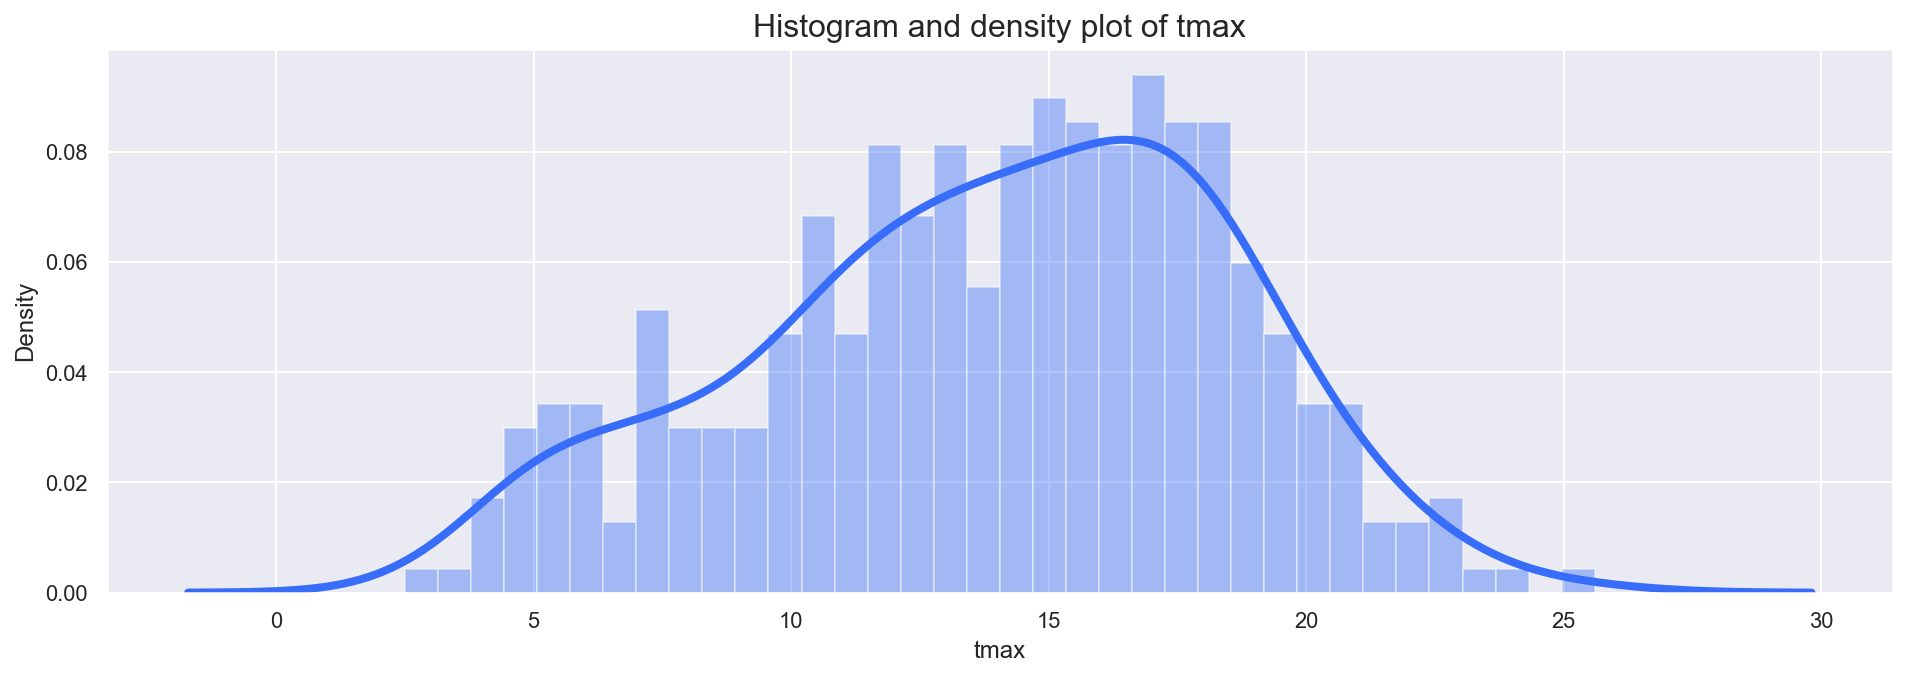

In [101]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.distplot(df_normal['tmax'], hist=True, kde=True, 
             bins=int(180/5), 
             #hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

plt.title("Histogram and density plot of tmax", fontsize=16);

In [102]:
#find frequency of each letter grade
pd.crosstab(index=df_new['tmax'], columns='count')

col_0  count
tmax        
2.5        4
3.4        4
3.8        4
4.2        8
4.4        4
...      ...
22.4       8
22.6       8
23.6       4
24.2       4
25.6       4

[155 rows x 1 columns]

#### Checking the mean,mode, median and the standard deviation
The should be the same if it is normally distribution

In [103]:
df_tmin = df_new['tmax']

x = df_tmin

from numpy import mean
from numpy import median
from numpy import std
from scipy import stats
from scipy.stats import mode

print("Mean:", round(mean(x), 2))
print("Median:", round(median(x), 2))
print("Mode:", int(stats.mode(x)[0]))
print("Standard deviation:", round(std(x)))

Mean: 13.93
Median: 14.3
Mode: 14
Standard deviation: 5


#### shapiro 

In [104]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# taking just numeric values from the dataset


df_list = list()

# normality test
for col in df_num.columns:
    stat, p = shapiro(df_num[col])
    # interpret
    alpha = 0.05
    
    # check for normality
    if p > alpha:
        result = "looks Gaussian/Normal (fail to reject H0)"
    else:
        result = "does not look Gaussian/Normal (reject H0)"
        
        
    df_stat = pd.DataFrame({'Column': [col],
                             'Statistics': [stat],
                              'p-value': [p],
                              'Result': [result],
                               })
    df_list.append(df_stat)
    

df_shapiro = pd.concat(df_list)
        
df_shapiro

Column  Statistics       p-value  \
0              IN    0.749754  2.263097e-42   
0             OUT    0.795996  2.215255e-39   
0           value    0.771174  4.770440e-41   
0            week    0.954693  7.370010e-21   
0            tavg    0.988354  2.054311e-09   
0            tmin    0.995009  8.849104e-05   
0            tmax    0.983043  4.415603e-12   
0            prcp    0.613936  0.000000e+00   
0  days_countdown    0.954819  7.870868e-21   

                                      Result  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)

#### normaltest

In [105]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# taking just numeric values from the dataset

df_list = list()

# normality test
for col in df_num.columns:
    stat, p = normaltest(df_num[col])
    # interpret
    alpha = 0.05
    
    # check for normality
    if p > alpha:
        result = "looks Gaussian/Normal (fail to reject H0)"
    else:
        result = "does not look Gaussian/Normal (reject H0)"
        
        
    df_stat = pd.DataFrame({'Column': [col],
                             'Statistics': [stat],
                              'p-value': [p],
                              'Result': [result],
                               })
    df_list.append(df_stat)
    

df_normaltest = pd.concat(df_list)
        
df_normaltest

Column   Statistics        p-value  \
0              IN   527.316099  3.124382e-115   
0             OUT   201.855226   1.471277e-44   
0           value   209.157848   3.819006e-46   
0            week  1118.477285  1.335806e-243   
0            tavg    38.432799   4.512568e-09   
0            tmin    19.656561   5.390537e-05   
0            tmax    50.561193   1.049002e-11   
0            prcp   976.505295  9.006778e-213   
0  days_countdown  1134.365724  4.738194e-247   

                                      Result  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)  
0  does not look Gaussian/Normal (reject H0)

From the pairplot above I can see that Henry street and In might have a normal distribution. So I'm going to filter the data

In [106]:
df_henry = df_new[(df_new['street']=="Capel_Street")]

x = df_henry['IN']


from numpy import mean
from numpy import std

print("Mean:", mean(x))
print("Standard deviation:", std(x))

Mean: 3052.468493150685
Standard deviation: 474.025878975848


(array([  1.,   0.,   2.,  13.,  42.,  68., 136.,  90.,  12.,   1.]),
 array([ 549. ,  949.3, 1349.6, 1749.9, 2150.2, 2550.5, 2950.8, 3351.1,
        3751.4, 4151.7, 4552. ]),
 <BarContainer object of 10 artists>)

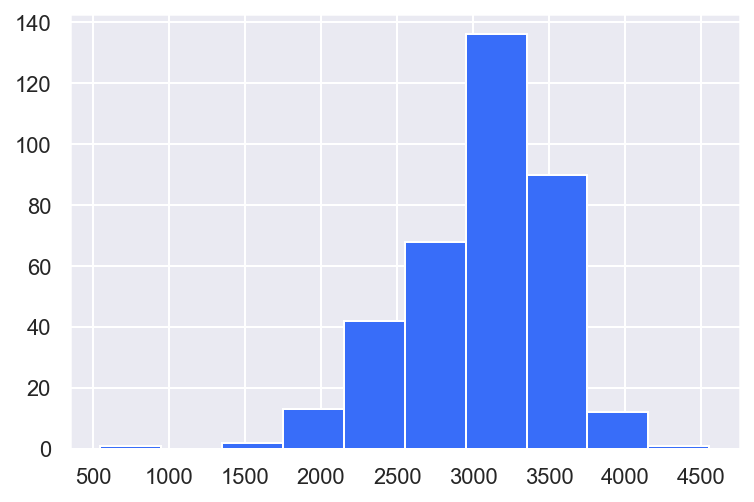

In [107]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#plt.hist(x, density=True, bins=30)  # density=False would make counts
#plt.ylabel('Probability')
#plt.xlabel('Data');

plt.hist(x)
plt.show()

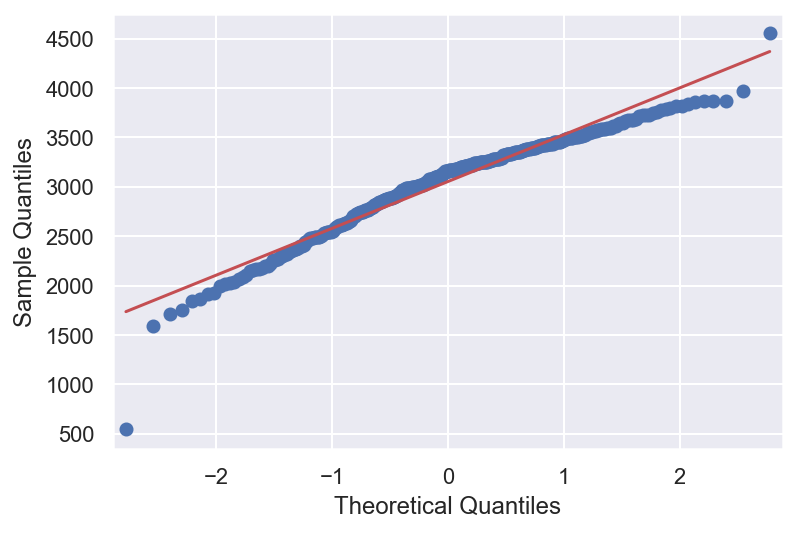

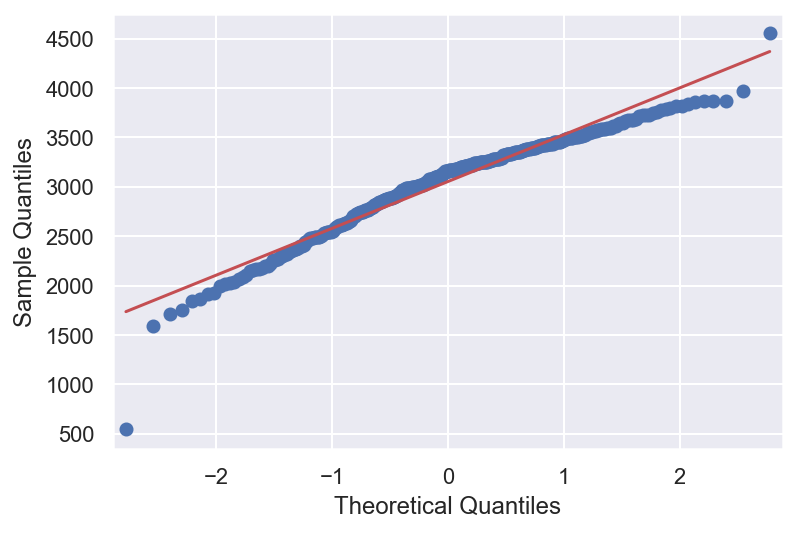

In [108]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(x, line='s')
plt.show()

#### Drop duplicates

In [110]:
df_new.drop_duplicates()

Date       IN      OUT        street    value        day     month  \
0    2015-01-01   1593.0   1888.0  Capel_Street   3481.0   Thursday   January   
1    2015-01-01   9520.0   9801.0  Henry_Street  19321.0   Thursday   January   
2    2015-01-01   1188.0   1069.0   Mary_Street   2257.0   Thursday   January   
3    2015-01-01   5879.0   4882.0  O_Connell_St  10761.0   Thursday   January   
4    2015-02-01   2150.0   2287.0  Capel_Street   4437.0     Sunday  February   
...         ...      ...      ...           ...      ...        ...       ...   
1455 2015-12-30   5722.0   5953.0  O_Connell_St  11675.0  Wednesday  December   
1456 2015-12-31   2704.0   2622.0  Capel_Street   5326.0   Thursday  December   
1457 2015-12-31  18593.0  20631.0  Henry_Street  39224.0   Thursday  December   
1458 2015-12-31   5270.0   1062.0   Mary_Street   6332.0   Thursday  December   
1459 2015-12-31   6336.0   7447.0  O_Connell_St  13783.0   Thursday  December   

      week  tavg  tmin  tmax  prcp  bank_holiday  days_countdown  
0        1  11.4   8.9  14.1   4.6          True             358  
1        1  11.4   8.9  14.1   4.6          True             358  
2        1  11.4   8.9  14.1   4.6          True             358  
3        1  11.4   8.9  14.1   4.6          True             358  
4        5   0.7  -1.9   4.6   0.0         False             327  
...    ...   ...   ...   ...   ...           ...             ...  
1455    53   9.2   6.6  10.9   5.8         False              -5  
1456    53   4.3   3.1   7.1   0.7         False              -6  
1457    53   4.3   3.1   7.1   0.7         False              -6  
1458    53   4.3   3.1   7.1   0.7         False              -6  
1459    53   4.3   3.1   7.1   0.7         False              -6  

[1460 rows x 14 columns]

In [111]:
import csv
with open("data/streets.csv", "w") as text_file:
    text_file.write(df_new.to_csv(index=False))

133072